___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 3 Handling with Outliers

## Introduction

### Importing Libraries

In [363]:
# import lineer algebra and data analysis library
import numpy as np
import pandas as pd

# import visualisation library
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# import warning library to suppress warnings
import warnings

### Settings

In [364]:
# Suppressing a warning 
warnings.filterwarnings("ignore")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

In [365]:
params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

### Reading filled_scout.csv file as a dataframe named df

In [366]:
df = pd.read_csv("filled_scout.csv")

### Creating a copy from df named df_copy

In [367]:
df_copy = df.copy()

### Checking the dataframe with head, tail and sample

In [368]:
# Checking the head of df

df.head()

make_model body_type     price        km  prev_owner  type body_color  \
0    Audi A1    Sedans 15,770.00 56,013.00        2.00  Used      Black   
1    Audi A1    Sedans 14,500.00 80,000.00        1.00  Used        Red   
2    Audi A1    Sedans 14,640.00 83,450.00        1.00  Used      Black   
3    Audi A1    Sedans 14,500.00 73,000.00        1.00  Used      Brown   
4    Audi A1    Sedans 16,790.00 16,200.00        1.00  Used      Black   

  paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
0   Metallic         5.00         5.00    Automatic         1,400.00   
1   Metallic         3.00         4.00    Automatic         1,800.00   
2   Metallic         4.00         4.00    Automatic         1,600.00   
3   Metallic         3.00         4.00    Automatic         1,400.00   
4   Metallic         5.00         5.00    Automatic         1,400.00   

   cylinders drive_chain                         fuel  co_2_emission  \
0       3.00       front  Diesel (Particulate Filter)          99.00   
1       4.00       front                      Benzine         129.00   
2       4.00       front  Diesel (Particulate Filter)          99.00   
3       3.00       front  Diesel (Particulate Filter)          99.00   
4       3.00       front  Diesel (Particulate Filter)         109.00   

  emission_class                                comfort_convenience  \
0         Euro 6  Air conditioning,Armrest,Automatic climate con...   
1         Euro 6  Air conditioning,Automatic climate control,Hil...   
2         Euro 6  Air conditioning,Cruise control,Electrical sid...   
3         Euro 6  Air suspension,Armrest,Auxiliary heating,Elect...   
4         Euro 6  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kw  \
0  ABS,Central door lock,Daytime running lights,D...   7.00  66.00   
1  ABS,Central door lock,Central door lock with r...   7.00 141.00   
2  ABS,Central door lock,Daytime running lights,D...   7.00  85.00   
3  ABS,Alarm system,Central door lock with remote...   6.00  66.00   
4  ABS,Central door lock,Driver-side airbag,Elect...   7.00  66.00   

  upholstery_type upholstery_color  weight_kg  consumption_comb  age  
0           Cloth            Black   1,220.00              3.80 3.00  
1           Cloth             Grey   1,255.00              5.60 2.00  
2           Cloth            Black   1,135.00              3.80 3.00  
3           Cloth            Black   1,195.00              3.80 3.00  
4           Cloth            Black   1,135.00              4.10 3.00

In [369]:
# Checking the tail of df

df.tail()

make_model body_type     price       km  prev_owner  \
15914  Renault Espace       Van 39,950.00    10.00        0.00   
15915  Renault Espace       Van 39,885.00 9,900.00        1.00   
15916  Renault Espace       Van 39,875.00    15.00        1.00   
15917  Renault Espace       Van 39,700.00    10.00        1.00   
15918  Renault Espace       Van 40,999.00 2,900.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
15914             New       Grey   Metallic         5.00         5.00   
15915            Used       Grey   Metallic         5.00         5.00   
15916  Pre-registered      White   Metallic         5.00         7.00   
15917  Pre-registered       Grey   Metallic         5.00         7.00   
15918   Demonstration       Grey   Metallic         5.00         5.00   

      gearing_type  displacement_cc  cylinders drive_chain  \
15914    Automatic         2,000.00       4.00       front   
15915    Automatic         1,800.00       4.00       front   
15916    Automatic         2,000.00       4.00       front   
15917    Automatic         2,000.00       4.00       front   
15918    Automatic         1,800.00       4.00         4WD   

                               fuel  co_2_emission emission_class  \
15914   Diesel (Particulate Filter)         139.00         Euro 6   
15915  Benzine (Particulate Filter)         168.00   Euro 6d-TEMP   
15916                        Diesel         139.00   Euro 6d-TEMP   
15917                        Diesel         139.00         Euro 6   
15918                       Benzine         153.00         Euro 6   

                                     comfort_convenience  \
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                        extras  \
15914                Alloy wheels,Touch screen   
15915  Alloy wheels,Touch screen,Voice Control   
15916                             Alloy wheels   
15917                Alloy wheels,Touch screen   
15918                Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
15914  ABS,Central door lock,Central door lock with r...   6.00 147.00   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...   7.00 165.00   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...   6.00 146.00   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...   6.00 147.00   
15918  ABS,Blind spot monitor,Daytime running lights,...   6.00 165.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
15914    Full leather            Brown   1,758.00              5.30 0.00  
15915           Cloth            Black   1,708.00              7.40 0.00  
15916    Full leather            Black   1,734.00              5.30 0.00  
15917    Part leather            Black   1,758.00              5.30 0.00  
15918    Full leather            Brown   1,685.00              6.80 0.00

In [370]:
# Checking the df by taking samples

df.sample(10)

make_model      body_type     price        km  prev_owner  \
10301     Opel Corsa        Compact 10,490.00      5.00        1.00   
14811   Renault Clio         Sedans 10,985.00     15.00        2.00   
8709      Opel Corsa        Compact  7,190.00 72,500.00        1.00   
8286      Opel Corsa        Compact 13,280.00 11,540.00        1.00   
605          Audi A1        Compact 12,900.00 76,000.00        1.00   
11772  Opel Insignia         Sedans 16,550.00 22,186.00        1.00   
1921         Audi A1         Sedans 28,690.00  3,333.00        1.00   
12008  Opel Insignia  Station wagon 22,950.00 62,295.00        1.00   
14072   Renault Clio  Station wagon 16,620.00    784.00        1.00   
7871      Opel Astra         Sedans 22,590.00     20.00        0.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
10301  Pre-registered      White   Metallic         3.00         5.00   
14811  Pre-registered      White   Metallic         5.00         5.00   
8709             Used      White   Metallic         3.00         5.00   
8286             Used      White   Metallic         5.00         5.00   
605              Used      Black   Metallic         5.00         4.00   
11772  Employee's car      Black   Metallic         4.00         5.00   
1921    Demonstration       Blue  Uni/basic         4.00         5.00   
12008            Used     Silver   Metallic         5.00         5.00   
14072            Used       Grey   Metallic         5.00         5.00   
7871              New      Black   Metallic         5.00         5.00   

      gearing_type  displacement_cc  cylinders drive_chain  \
10301       Manual         1,200.00       4.00       front   
14811       Manual           900.00       3.00       front   
8709        Manual         1,200.00       4.00       front   
8286     Automatic         1,400.00       4.00       front   
605         Manual         1,400.00       3.00       front   
11772       Manual         1,500.00       4.00       front   
1921     Automatic         1,000.00       3.00       front   
12008    Automatic         2,000.00       4.00       front   
14072    Automatic         1,500.00       4.00       front   
7871     Automatic         1,400.00       4.00       front   

                              fuel  co_2_emission emission_class  \
10301                      Benzine         132.00        Euro 6d   
14811                      Benzine         113.00         Euro 6   
8709                       Benzine         128.00         Euro 6   
8286                       Benzine         110.00         Euro 6   
605                         Diesel          97.00         Euro 6   
11772                      Benzine         141.00         Euro 6   
1921                       Benzine         111.00         Euro 6   
12008  Diesel (Particulate Filter)         150.00         Euro 6   
14072                       Diesel          92.00         Euro 6   
7871                       Benzine         139.00   Euro 6d-TEMP   

                                     comfort_convenience  \
10301  Air conditioning,Electrical side mirrors,Hill ...   
14811  Air conditioning,Cruise control,Electrical sid...   
8709   Air conditioning,Cruise control,Electrical sid...   
8286   Air conditioning,Cruise control,Electrical sid...   
605    Air conditioning,Armrest,Electrical side mirro...   
11772  Air conditioning,Armrest,Automatic climate con...   
1921   Air conditioning,Armrest,Automatic climate con...   
12008  Air conditioning,Armrest,Automatic climate con...   
14072  Air conditioning,Cruise control,Electrically a...   
7871   Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
10301                            On-board computer,Radio   
14811  Bluetooth,Hands-free equipment,MP3,On-board co...   
8709   Bluetooth,CD player,Hands-free equipment,MP3,O...   
8286   Bluetooth,CD player,Hands-free equipment,On-bo...   
605    Bluetooth,CD player,MP3,

### Checking the summary information of df

In [371]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  float64
 3   km                   15919 non-null  float64
 4   prev_owner           15919 non-null  float64
 5   type                 15919 non-null  object 
 6   body_color           15919 non-null  object 
 7   paint_type           15919 non-null  object 
 8   nr_of_doors          15919 non-null  float64
 9   nr_of_seats          15919 non-null  float64
 10  gearing_type         15919 non-null  object 
 11  displacement_cc      15919 non-null  float64
 12  cylinders            15919 non-null  float64
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co_2_emission        15919 non-null 

### Checking the null values of df

In [372]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

##  Handling with Outliers for Numeric Columns

The first address of this subsection is about isolating the culumns with numerical values from the whole dataset.

In [373]:
df_numeric= df.select_dtypes(exclude=["object"])

In [374]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15919 non-null  float64
 1   km                15919 non-null  float64
 2   prev_owner        15919 non-null  float64
 3   nr_of_doors       15919 non-null  float64
 4   nr_of_seats       15919 non-null  float64
 5   displacement_cc   15919 non-null  float64
 6   cylinders         15919 non-null  float64
 7   co_2_emission     15919 non-null  float64
 8   gears             15919 non-null  float64
 9   hp_kw             15919 non-null  float64
 10  weight_kg         15919 non-null  float64
 11  consumption_comb  15919 non-null  float64
 12  age               15919 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


### Histplots for numeric columns

It is sometime useful to understand the distribution of predictor variables to find influential outliers or concentrated values. Then, a highly skewed independent variable may be made more symmetric with a transformation. Then, it makes sense to think of a predictor as random.

So let's look at the distribution of our dataset.

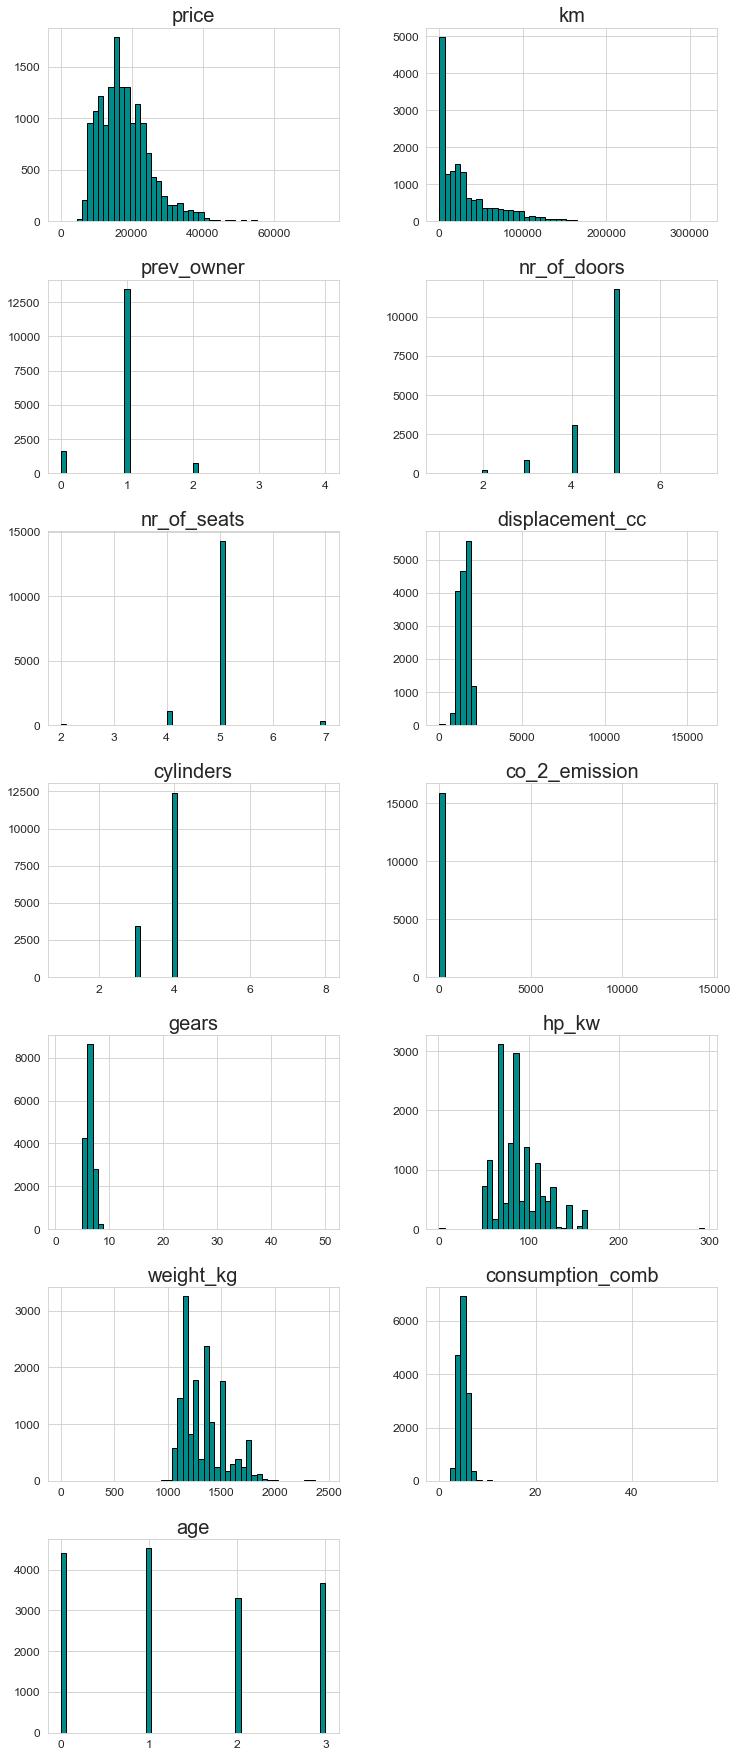

In [375]:
fig_ = df_numeric.hist(figsize=(12, 36), layout=(8,2),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=12, ylabelsize=12)

### Box plots for numeric columns

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. So let's look at the variation of the target feature with respect to each numeric feature. 

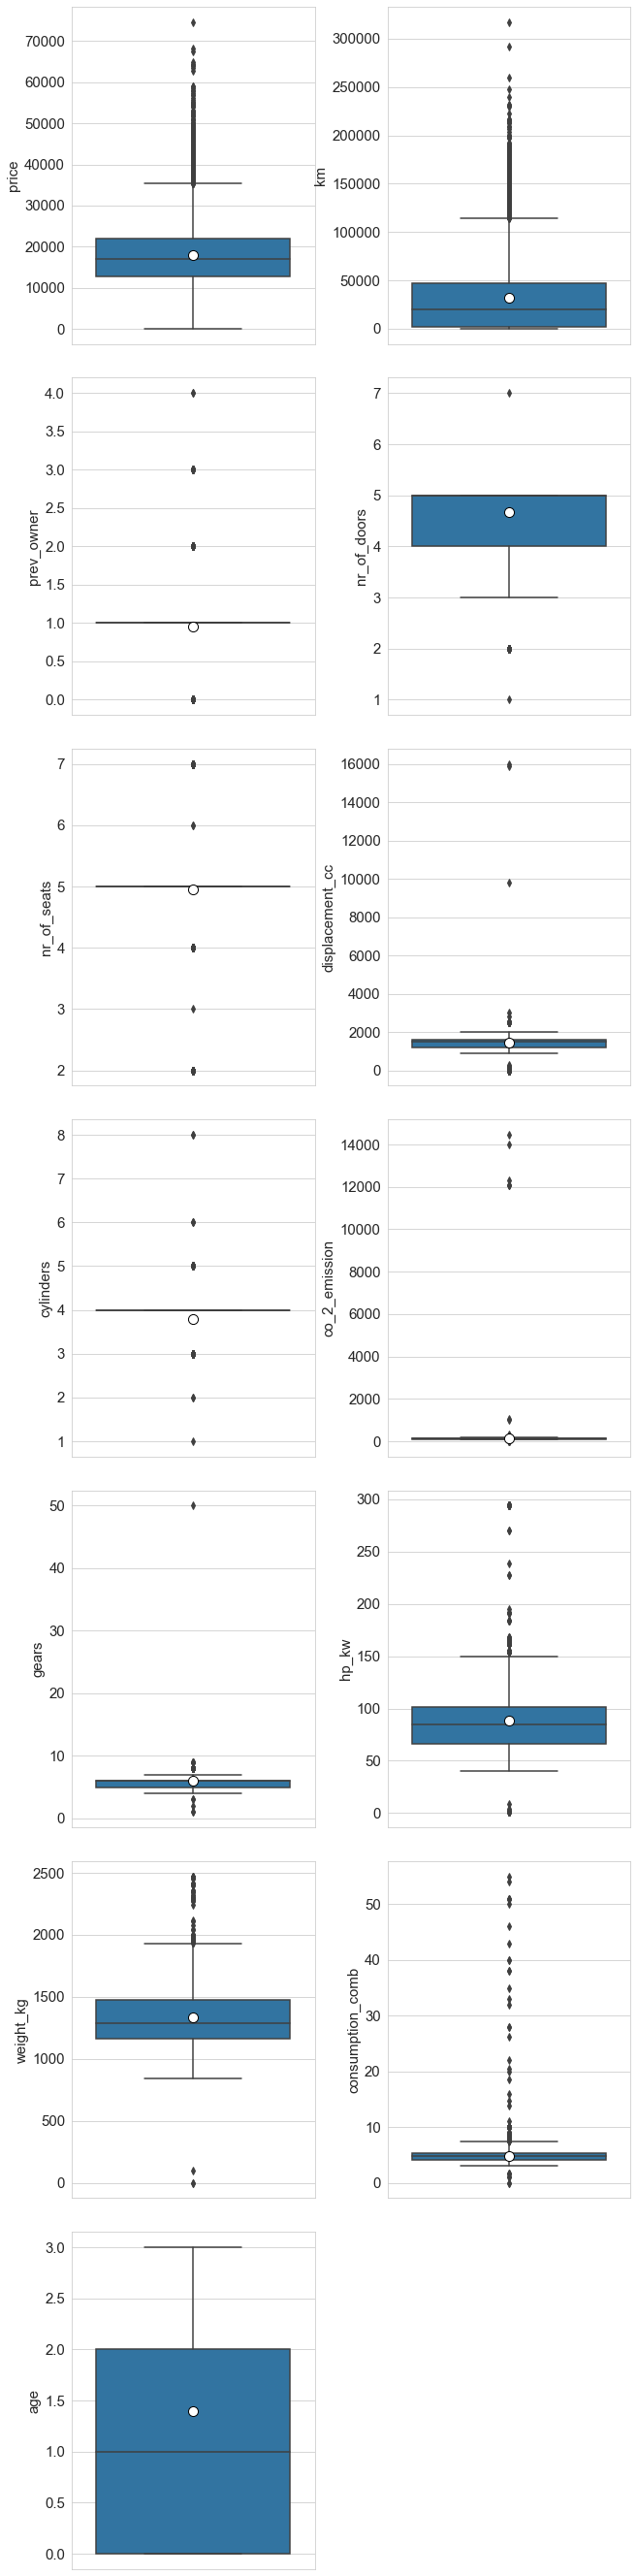

In [377]:
fig = plt.figure(figsize=(10,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(y=col, data=df_numeric)

### Scatter plots for numeric columns

A straightforward and widely used vizualisation technique for accessing the relationship between two or more variables is the scatterplot.

In fact, scatterplots show possible associations or relationships between two variables. However, just because your graph or chart shows something is going on, it doesn’t mean that a cause-and-effect relationship exists. So we better be careful with how we interpret the graphs obtained.


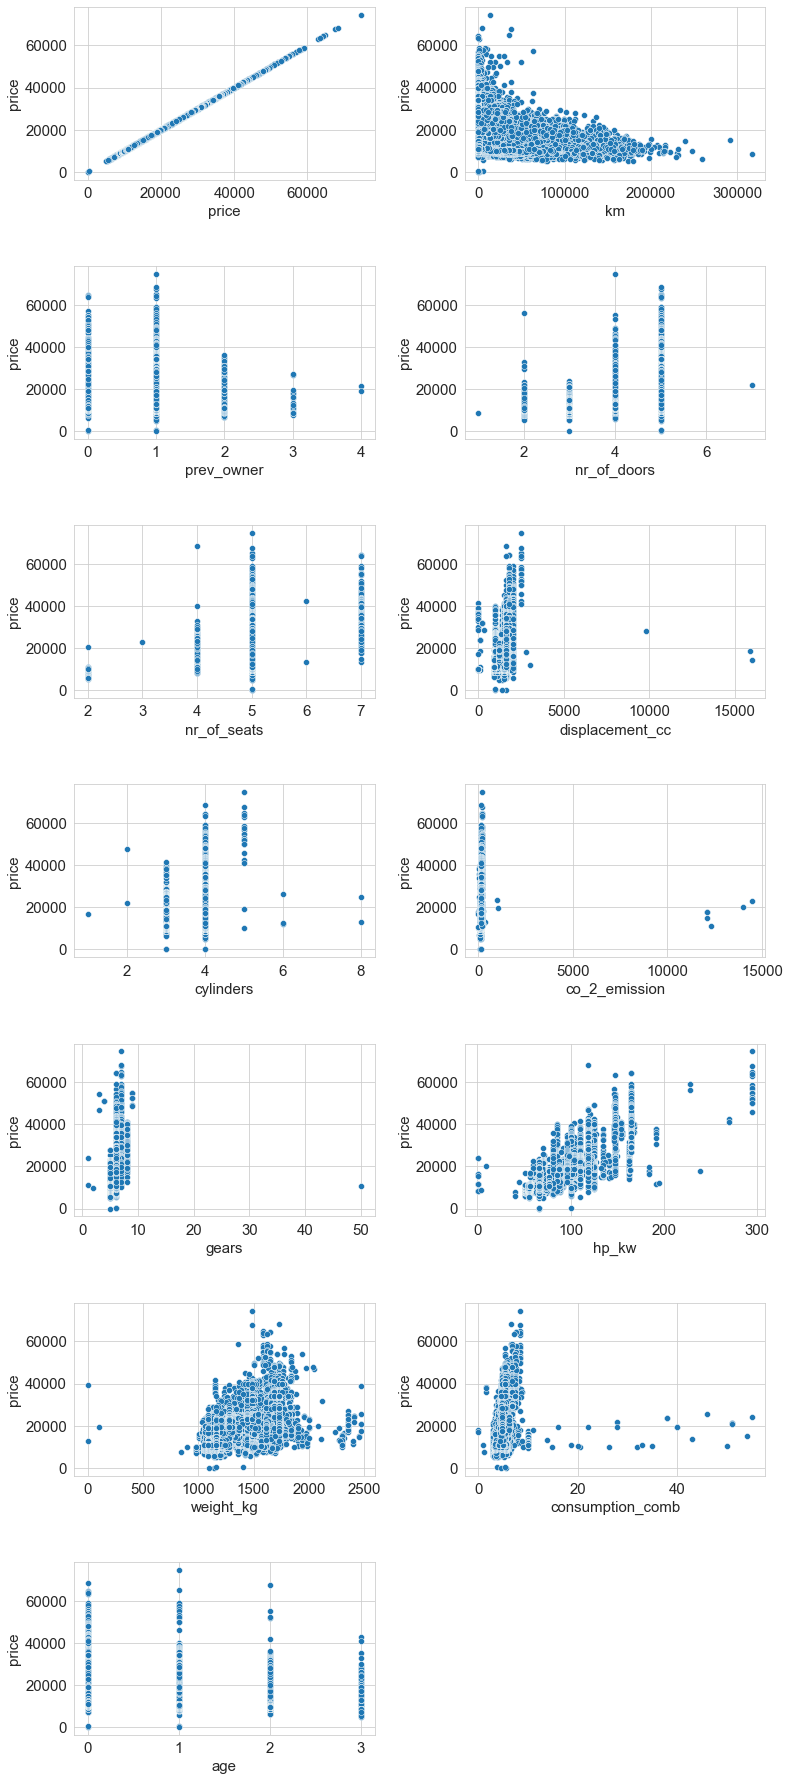

In [378]:
fig = plt.figure(figsize=(12,24))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

### Regplots for numeric columns

Also, let's look at regresion plots for numerical columns.

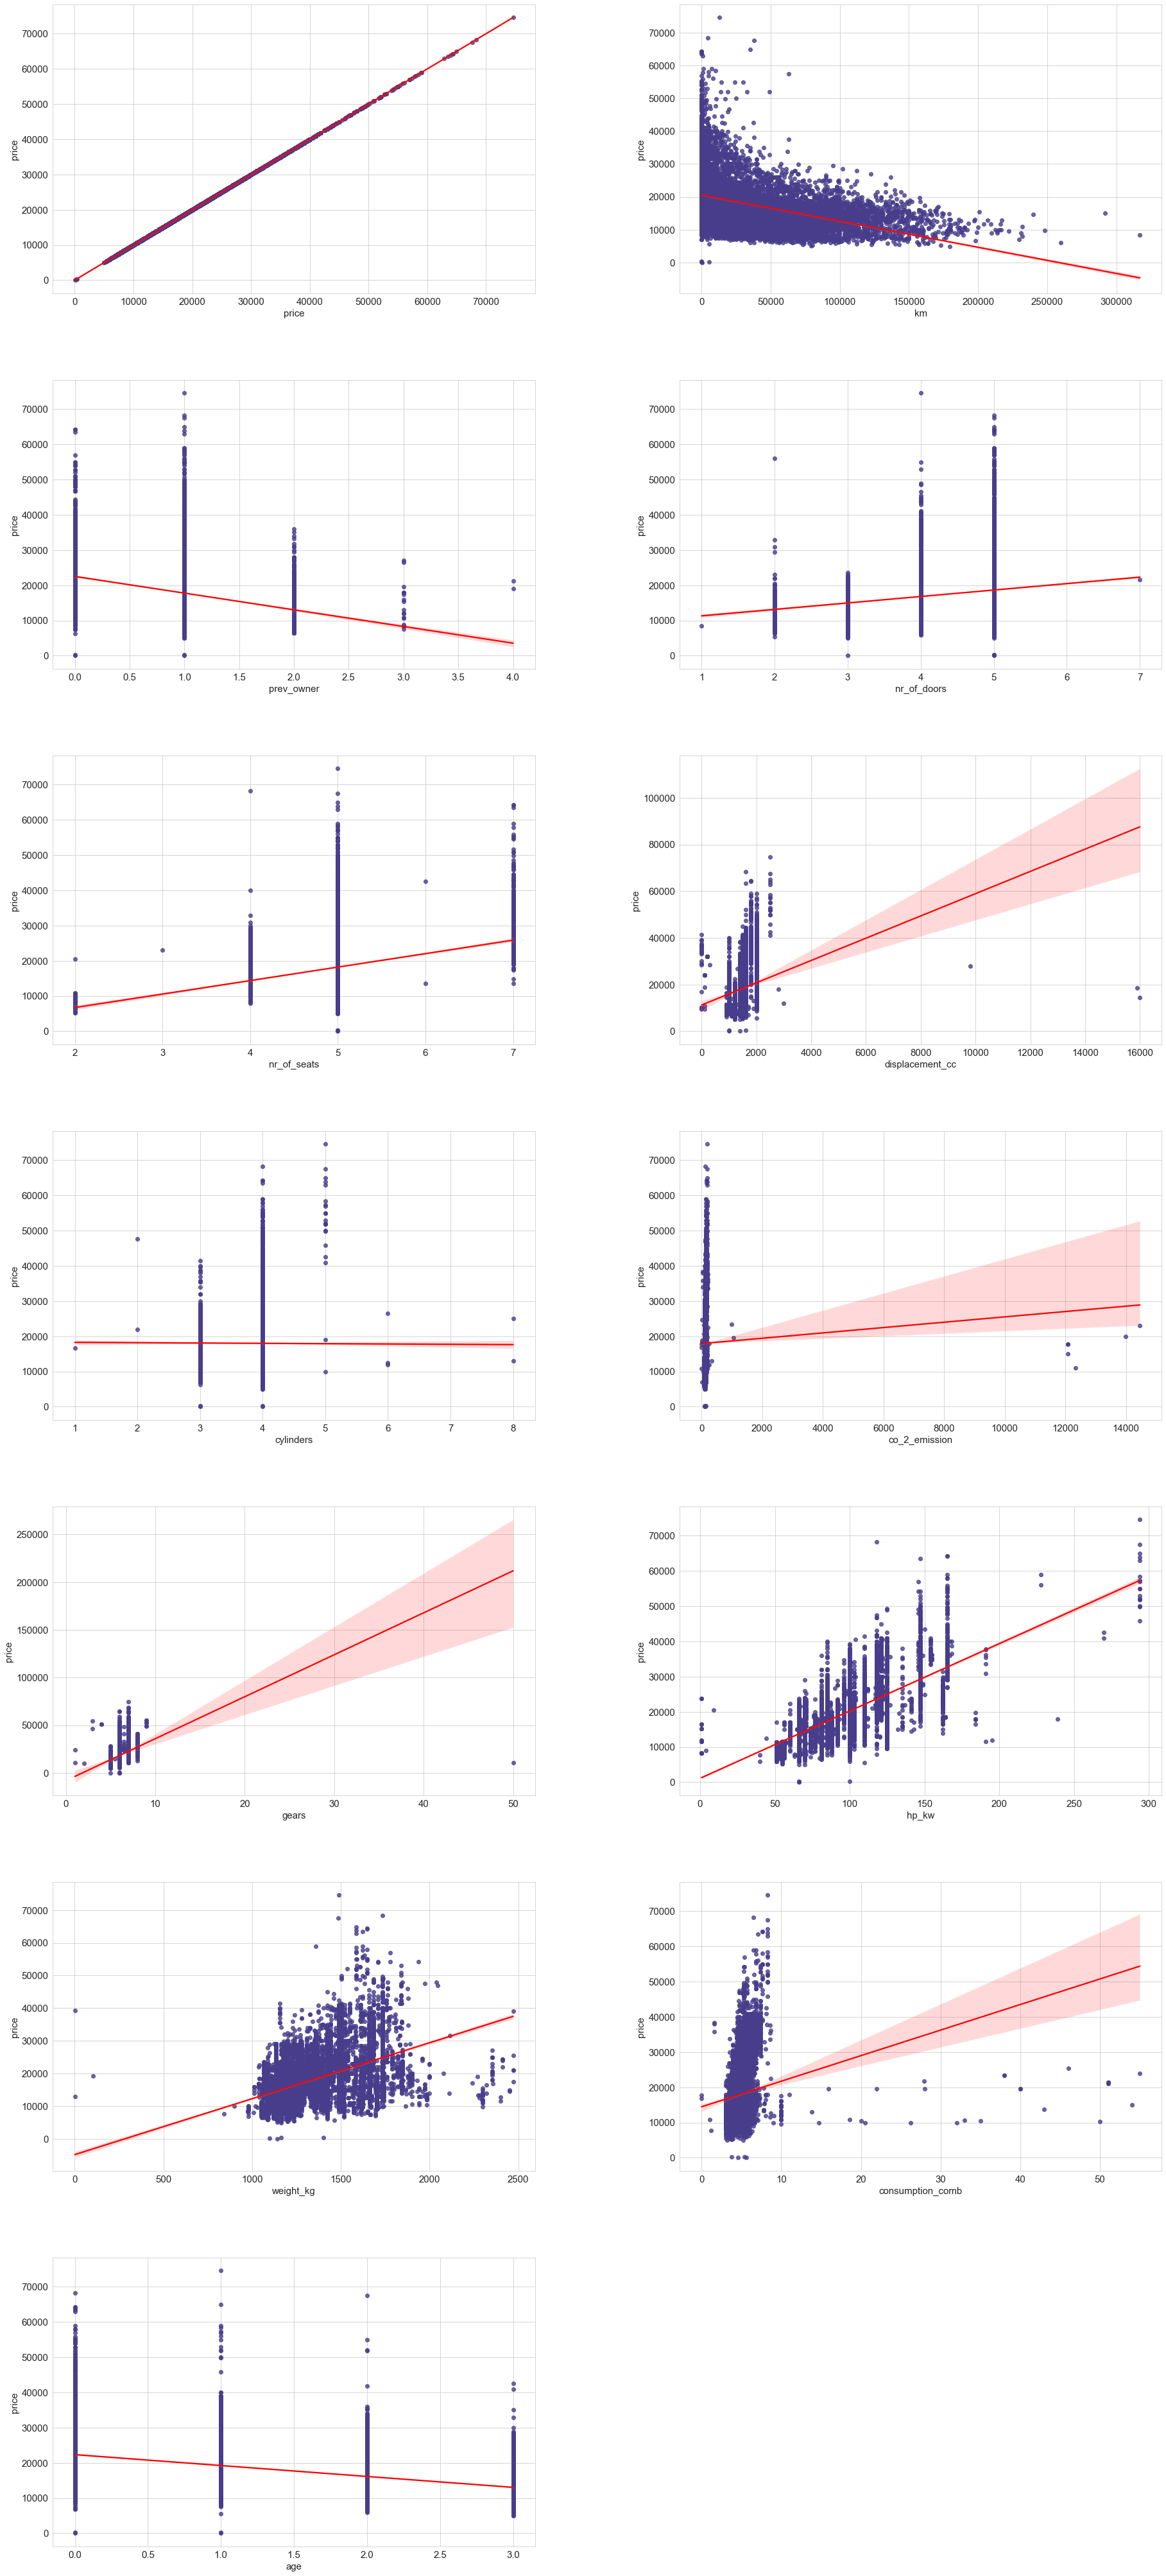

In [379]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

### Conclusion about plots of numeric columns

- There is a negative relationship between price and km, and values that can be outlier over 250,000 are seen.

- prew_owner can also be 4 outliers.

- Values of more than 6 doors and 1 door can be outlier in the nr_of_doors column.

- There can be 3 and 6 outliers in the nr_of_seats column.

- There is a possibility that 3 values in displacement_cc are outliers.

- Values ​​less than 3 and greater than 6 can be outliers.

- Values greater than 10000 in the co_2_emission column seem to be outliers.

- In the gears column, the value 50 should be examined.
- Values less than 500 in the weight_kg column should be checked.
- consumption_comb can be outlier from about 20.

### Defining a function to find iqr lower, upper  limits

In [380]:
def iqr_lower_upper (col) :
    global lower, upper
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 -q1
    lower = q1 -1.5*iqr
    upper = q3 + 1.5*iqr
    nr_extreme = df.loc[(df[col] < lower) | (df[col] > upper)].shape[0] 
    print(f"lower limit : {lower},\nupper limit: {upper},\nthe number of extreme values outside the lower and upper limits : {nr_extreme}")

## Handling with Outliers Column by Column

In [381]:
df_numeric.columns, len(df_numeric.columns)

(Index(['price', 'km', 'prev_owner', 'nr_of_doors', 'nr_of_seats',
        'displacement_cc', 'cylinders', 'co_2_emission', 'gears', 'hp_kw',
        'weight_kg', 'consumption_comb', 'age'],
       dtype='object'),
 13)

### km column

In [382]:
df.km.value_counts(dropna=False).sort_index()

0.00           19
1.00          367
2.00            6
3.00           33
4.00           15
             ... 
240,000.00      1
248,000.00      1
260,000.00      1
291,800.00      1
317,000.00      1
Name: km, Length: 6690, dtype: int64

In [383]:
iqr_lower_upper ("km")

lower limit : -65347.75,
upper limit: 114246.25,
the number of extreme values outside the lower and upper limits : 691


It doesn't make sense to consider high values in the km column as outliers. So there is no value to handle in the km column.

### prev_owner

In [384]:
df.prev_owner.value_counts(dropna=False)

1.00    13463
0.00     1659
2.00      778
3.00       17
4.00        2
Name: prev_owner, dtype: int64

In [385]:
iqr_lower_upper ("prev_owner")

lower limit : 1.0,
upper limit: 1.0,
the number of extreme values outside the lower and upper limits : 2456


Values in this column should not be considered outliers.

### nr_of_doors column

In [386]:
df.nr_of_doors.value_counts(dropna=False)

5.00    11787
4.00     3079
3.00      832
2.00      219
1.00        1
7.00        1
Name: nr_of_doors, dtype: int64

In [387]:
iqr_lower_upper("nr_of_doors")

lower limit : 2.5,
upper limit: 6.5,
the number of extreme values outside the lower and upper limits : 221


In [388]:
df[df_numeric.nr_of_doors==1]

make_model body_type    price        km  prev_owner  type body_color  \
13782  Renault Clio   Compact 8,500.00 41,493.00        1.00  Used      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
13782   Metallic         1.00         5.00       Manual         1,500.00   

       cylinders drive_chain    fuel  co_2_emission emission_class  \
13782       4.00       front  Diesel          85.00         Euro 6   

                                     comfort_convenience  \
13782  Air conditioning,Cruise control,Hill Holder,Mu...   

               entertainment_media        extras  \
13782  Bluetooth,On-board computer  Alloy wheels   

                                         safety_security  gears  hp_kw  \
13782  ABS,Central door lock,Daytime running lights,D...   5.00  55.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
13782           Cloth            Black   1,087.00              3.15 3.00

In [389]:
df[df_numeric.nr_of_doors==2]

make_model body_type     price        km  prev_owner            type  \
26        Audi A1   Compact 11,444.00 84,029.00        1.00            Used   
44        Audi A1    Sedans 11,490.00 44,120.00        1.00            Used   
48        Audi A1   Compact 11,490.00 58,000.00        2.00            Used   
55        Audi A1   Compact 10,999.00 69,500.00        1.00            Used   
56        Audi A1   Compact 10,900.00 43,500.00        1.00            Used   
...           ...       ...       ...       ...         ...             ...   
10304  Opel Corsa   Compact 10,499.00    325.00        0.00             New   
10314  Opel Corsa   Compact  9,990.00    100.00        0.00             New   
10380  Opel Corsa   Compact 11,290.00     12.00        1.00  Pre-registered   
10413  Opel Corsa   Compact 11,190.00     10.00        1.00  Pre-registered   
10444  Opel Corsa   Compact 10,990.00     12.00        1.00  Pre-registered   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
26          Blue   Metallic         2.00         4.00       Manual   
44         Black   Metallic         2.00         5.00       Manual   
48         Black   Metallic         2.00         4.00       Manual   
55         Black   Metallic         2.00         4.00       Manual   
56         White   Metallic         2.00         4.00       Manual   
...          ...        ...          ...          ...          ...   
10304        Red   Metallic         2.00         4.00       Manual   
10314       Blue   Metallic         2.00         5.00       Manual   
10380        Red   Metallic         2.00         5.00       Manual   
10413       Blue   Metallic         2.00         5.00       Manual   
10444       Blue   Metallic         2.00         5.00       Manual   

       displacement_cc  cylinders drive_chain                          fuel  \
26            1,000.00       3.00       front                       Benzine   
44            1,400.00       3.00       front   Diesel (Particulate Filter)   
48            1,000.00       3.00       front                       Benzine   
55            1,000.00       3.00       front                       Benzine   
56            1,000.00       3.00       front                       Benzine   
...                ...        ...         ...                           ...   
10304         1,200.00       4.00       front                       Benzine   
10314         1,200.00       4.00       front  Benzine (Particulate Filter)   
10380         1,200.00       4.00       front                       Benzine   
10413         1,200.00       4.00       front                       Benzine   
10444         1,200.00       4.00       front                       Benzine   

       co_2_emission emission_class  \
26             97.00         Euro 6   
44             94.00         Euro 6   
48            102.00         Euro 6   
55            102.00         Euro 5   
56             97.00         Euro 6   
...              ...            ...   
10304         126.00   Euro 6d-TEMP   
10314         126.00   Euro 6d-TEMP   
10380         126.00   Euro 6d-TEMP   
10413         126.00   Euro 6d-TEMP   
10444         126.00   Euro 6d-TEMP   

                                     comfort_convenience  \
26     Air conditioning,Automatic climate control,Ele...   
44     Air conditioning,Cruise control,Electrical sid...   
48     Air conditioning,Electrical side mirrors,Leath...   
55     Air conditioning,Armrest,Automatic climate con...   
56     Air conditioning,Electrical side mirrors,Power...   
...                                                  ...   
10304  Air conditioning,Electrical side mirrors,Power...   
10314  Air conditioning,Electrical side mirrors,Hill ...   
10380  Air conditioning,Electrical side mirrors,Power...   
10413  Air conditioning,Electrical side mirrors,Hill ...   
10444  Air conditioning,Electrical side mirrors,Power...   

                                     entertainment_media  \
26     Bluetooth,C

In [390]:
df[df_numeric.nr_of_doors==7]

make_model body_type     price        km  prev_owner  type  \
15202  Renault Espace       Van 21,600.00 78,000.00        1.00  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
15202      Brown   Metallic         7.00         5.00    Automatic   

       displacement_cc  cylinders drive_chain    fuel  co_2_emission  \
15202         1,600.00       4.00       front  Diesel         120.00   

      emission_class                                comfort_convenience  \
15202         Euro 6  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
15202  Bluetooth,Digital radio,MP3,On-board computer,...   

                          extras  \
15202  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
15202  ABS,Blind spot monitor,Central door lock,Dayti...   6.00 118.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
15202    Full leather            Brown   1,734.00              4.60 3.00

The ones with 1 and 7 doors will be evaluated as outlier and grouped according to make_model and boy_type and filled with mode.

In [391]:
nr_doors_1 = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "nr_of_doors"].mode()[0]

In [392]:
nr_doors_7 = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "nr_of_doors"].mode()[0]

In [393]:
df.nr_of_doors.replace(to_replace=[1,7], value=[nr_doors_1, nr_doors_7], inplace=True)

In [394]:
## Alternative code
# df.nr_of_doors.replace(to_replace=[1,7], value=df.nr_of_doors.mode()[0],inplace=True)

In [395]:
df.nr_of_doors.value_counts()

5.00    11789
4.00     3079
3.00      832
2.00      219
Name: nr_of_doors, dtype: int64

### nr_of_seats column

In [396]:
df.nr_of_seats.value_counts(dropna=False)

5.00    14308
4.00     1127
7.00      362
2.00      119
6.00        2
3.00        1
Name: nr_of_seats, dtype: int64

In [397]:
iqr_lower_upper("nr_of_seats")

lower limit : 5.0,
upper limit: 5.0,
the number of extreme values outside the lower and upper limits : 1611


According to our research on the domain, there may be 3 and 6 outliers.

In [399]:
df[df.nr_of_seats==3]

make_model body_type     price       km  prev_owner  type body_color  \
1636    Audi A1   Compact 23,090.00 9,821.00        1.00  Used      Black   

     paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
1636   Metallic         2.00         3.00    Automatic         1,800.00   

      cylinders drive_chain     fuel  co_2_emission emission_class  \
1636       4.00       front  Benzine         134.00         Euro 6   

                                    comfort_convenience  \
1636  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
1636  Bluetooth,CD player,Digital radio,Hands-free e...   

                                                 extras  \
1636  Alloy wheels,Catalytic Converter,Sport package...   

                                        safety_security  gears  hp_kw  \
1636  ABS,Central door lock,Daytime running lights,D...   7.00 141.00   

     upholstery_type upholstery_color  weight_kg  consumption_comb  age  
1636    Part leather            Black   1,180.00              5.80 1.00

In [400]:
df[df.nr_of_seats==6]

make_model      body_type     price         km  prev_owner  type  \
582           Audi A1        Compact 13,500.00 100,000.00        1.00  Used   
15890  Renault Espace  Station wagon 42,490.00      10.00        0.00   New   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
582        White   Metallic         5.00         6.00       Manual   
15890      Black   Metallic         5.00         6.00    Automatic   

       displacement_cc  cylinders drive_chain                         fuel  \
582           1,000.00       4.00       front                      Benzine   
15890         2,000.00       4.00       front  Diesel (Particulate Filter)   

       co_2_emission emission_class  \
582           102.00         Euro 6   
15890         168.00   Euro 6d-TEMP   

                                     comfort_convenience  \
582                                     Air conditioning   
15890  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
582                                    On-board computer   
15890  Bluetooth,Hands-free equipment,On-board comput...   

                          extras  \
582                 Alloy wheels   
15890  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
582                                                  ABS   5.00  70.00   
15890  ABS,Blind spot monitor,Central door lock,Dayti...   6.00 147.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
582             Cloth            Black   1,500.00              4.30 2.00  
15890           Cloth            Other   1,840.00              5.70 0.00

In [401]:
df[df.make_model=="Renault Espace"].head(50)

make_model      body_type     price         km  prev_owner  \
14928  Renault Espace            Van 17,500.00 141,000.00        1.00   
14929  Renault Espace  Station wagon 17,950.00  99,950.00        1.00   
14930  Renault Espace    Transporter 17,950.00  99,950.00        1.00   
14931  Renault Espace            Van 17,990.00 109,745.00        1.00   
14932  Renault Espace            Van 22,600.00 100,000.00        1.00   
14933  Renault Espace    Transporter 22,500.00  84,000.00        1.00   
14934  Renault Espace            Van 22,690.00  68,021.00        1.00   
14935  Renault Espace            Van 22,500.00  32,559.00        1.00   
14936  Renault Espace       Off-Road 22,500.00  70,000.00        1.00   
14937  Renault Espace            Van 22,990.00  76,950.00        1.00   
14938  Renault Espace            Van 23,690.00  53,447.00        1.00   
14939  Renault Espace    Transporter 24,900.00  19,377.00        1.00   
14940  Renault Espace            Van 24,999.00  10,613.00        1.00   
14941  Renault Espace            Van 24,999.00  10,890.00        1.00   
14942  Renault Espace            Van 24,590.00  16,163.00        1.00   
14943  Renault Espace            Van 24,999.00  18,000.00        1.00   
14944  Renault Espace            Van 25,490.00  49,606.00        2.00   
14945  Renault Espace            Van 25,490.00  49,606.00        2.00   
14946  Renault Espace    Transporter 24,900.00  21,790.00        1.00   
14947  Renault Espace            Van 25,490.00  49,606.00        2.00   
14948  Renault Espace            Van 26,900.00   2,748.00        1.00   
14949  Renault Espace            Van 26,895.00  50,544.00        1.00   
14950  Renault Espace    Transporter 26,900.00 122,518.00        1.00   
14951  Renault Espace            Van 26,900.00      12.00        1.00   
14952  Renault Espace  Station wagon 26,890.00   7,300.00        2.00   
14953  Renault Espace         Sedans 25,995.00  14,478.00        1.00   
14954  Renault Espace            Van 25,990.00  34,987.00        1.00   
14955  Renault Espace         Sedans 25,995.00  16,247.00        1.00   
14956  Renault Espace            Van 27,790.00  22,220.00        1.00   
14957  Renault Espace            Van 27,600.00  43,000.00        1.00   
14958  Renault Espace            Van 27,590.00  26,800.00        1.00   
14959  Renault Espace            Van 27,500.00  25,836.00        1.00   
14960  Renault Espace            Van 25,990.00  15,888.00        1.00   
14961  Renault Espace          Other 25,990.00  33,500.00        1.00   
14962  Renault Espace            Van 25,990.00  45,000.00        1.00   
14963  Renault Espace            Van 25,990.00  16,613.00        1.00   
14964  Renault Espace  Station wagon 25,990.00  64,000.00        1.00   
14965  Renault Espace  Station wagon 25,980.00  53,000.00        1.00   
14966  Renault Espace            Van 25,950.00  55,800.00        2.00   
14967  Renault Espace            Van 25,950.00 136,863.00        1.00   
14968  Renault Espace         Sedans 25,900.00  41,378.00        1.00   
14969  Renault Espace            Van 25,885.00  53,745.00        2.00   
14970  Renault Espace            Van 25,750.00  28,918.00        1.00   
14971  Renault Espace            Van 25,650.00  31,221.00        2.00   
14972  Renault Espace  Station wagon 25,500.00  47,000.00        1.00   
14973  Renault Espace            Van 25,500.00  33,837.00        1.00   
14974  Renault Espace  Station wagon 27,500.00  31,200.00        1.00   
14975  Renault Espace            Van 25,500.00  46,000.00        1.00   
14976  Renault Espace            Van 27,500.00  24,200.00        1.00   
14977  Renault Espace  Station wagon 27,500.00  44,000.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
14928            Used      White   Metallic         5.00         5.00   
14929            Used      Brown   Metallic         5.00         5.00   
14930            Used      Brown   Metallic         5.00         5.0

It was decided not to consider any value as an outlier in case some changes were made on these cars.

### displacement_cc column

In [402]:
iqr_lower_upper("displacement_cc")

lower limit : 600.0,
upper limit: 2200.0,
the number of extreme values outside the lower and upper limits : 77


In [403]:
df[(df.displacement_cc < lower) | (df.displacement_cc > upper)].sort_values(by = ["displacement_cc"])

make_model      body_type     price         km  prev_owner  \
12554   Opel Insignia  Station wagon 33,590.00   1,574.00        1.00   
12823   Opel Insignia  Station wagon 28,500.00   2,900.00        1.00   
10559   Opel Insignia  Station wagon 16,950.00  84,700.00        1.00   
12815   Opel Insignia  Station wagon 32,990.00       6.00        1.00   
12800   Opel Insignia  Station wagon 33,790.00   6,446.00        1.00   
12467   Opel Insignia  Station wagon 37,490.00   2,900.00        1.00   
12473   Opel Insignia  Station wagon 34,490.00   2,900.00        1.00   
12484   Opel Insignia         Sedans 33,990.00      10.00        1.00   
12499   Opel Insignia  Station wagon 36,990.00   2,900.00        1.00   
12790   Opel Insignia  Station wagon 35,990.00   2,348.00        1.00   
12501   Opel Insignia  Station wagon 36,990.00      70.00        1.00   
12604   Opel Insignia  Station wagon 28,990.00   2,254.00        1.00   
12670   Opel Insignia  Station wagon 29,990.00   2,900.00        1.00   
12750   Opel Insignia         Sedans 41,490.00      10.00        0.00   
12768   Opel Insignia  Station wagon 39,190.00      10.00        0.00   
12769   Opel Insignia        Compact 38,990.00   1,852.00        1.00   
12781   Opel Insignia  Station wagon 36,500.00   2,900.00        1.00   
12783   Opel Insignia        Compact 36,490.00   3,291.00        1.00   
12786   Opel Insignia  Station wagon 36,780.00      70.00        1.00   
12798   Opel Insignia  Station wagon 33,990.00   3,582.00        1.00   
12835   Opel Insignia         Sedans 34,925.00   4,631.00        1.00   
12796   Opel Insignia         Sedans 35,990.00     136.00        1.00   
12849   Opel Insignia  Station wagon 33,990.00       8.00        1.00   
14328    Renault Clio         Sedans  9,999.00  17,364.00        1.00   
14327    Renault Clio         Sedans  9,999.00  21,543.00        1.00   
14326    Renault Clio         Sedans  9,999.00  14,066.00        1.00   
14325    Renault Clio         Sedans  9,999.00  14,532.00        1.00   
14324    Renault Clio         Sedans  9,999.00  30,000.00        1.00   
14322    Renault Clio         Sedans  9,999.00  15,678.00        1.00   
14321    Renault Clio         Sedans  9,999.00  14,039.00        1.00   
12848   Opel Insignia  Station wagon 33,990.00   1,798.00        1.00   
14319    Renault Clio         Sedans  9,999.00  11,004.00        1.00   
14315    Renault Clio         Sedans  9,999.00   8,031.00        1.00   
14320    Renault Clio         Sedans  9,999.00  15,674.00        1.00   
14284    Renault Clio         Sedans  9,999.00  18,008.00        1.00   
14198    Renault Clio         Sedans  9,680.00  44,235.00        1.00   
13904    Renault Clio         Sedans  9,490.00  26,000.00        1.00   
14314    Renault Clio         Sedans  9,999.00  11,314.00        1.00   
13912    Renault Clio         Sedans  9,400.00  17,000.00        1.00   
10194      Opel Corsa        Compact 10,940.00      12.00        1.00   
8128       Opel Astra  Station wagon 18,830.00      10.00        1.00   
7812       Opel Astra         Sedans 23,940.00      12.00        1.00   
7811       Opel Astra         Sedans 23,940.00      12.00        1.00   
7809       Opel Astra         Sedans 23,940.00      12.00        1.00   
7810       Opel Astra         Sedans 23,940.00      12.00        1.00   
15574  Renault Espace            Van 31,900.00       1.00        1.00   
15575  Renault Espace            Van 31,900.00       1.00        1.00   
15576  Renault Espace            Van 31,900.00       1.00        1.00   
15577  Renault Espace            Van 31,900.00       1.00        1.00   
15579  Renault Espace            Van 31,900.00       1.00        1.00   
15578  Renault Espace            Van 31,900.00       1.00        1.00   
1937          Audi A1        Compact 28,490.00      10.00        0.00   
3587          Audi A3         Sedans 64,900.00  35,000.00        1.00   
3590          Audi A3         Sedans 62,900.00     700.00        1.00

In [404]:
df[(df.displacement_cc < lower) | (df.displacement_cc > upper)].sort_values(by = ["displacement_cc"]).shape[0]

77

In [405]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")][["displacement_cc","hp_kw", "cylinders"]].sort_values(by="displacement_cc", ascending=False).head(50)

displacement_cc  hp_kw  cylinders
10932        16,000.00  88.00       4.00
10771         3,000.00 100.00       6.00
10513         2,800.00 239.00       4.00
13054         2,000.00 154.00       4.00
12182         2,000.00 125.00       4.00
11222         2,000.00 125.00       4.00
12212         2,000.00 125.00       4.00
11224         2,000.00 125.00       4.00
12209         2,000.00 125.00       4.00
12195         2,000.00 125.00       4.00
12189         2,000.00 125.00       4.00
12183         2,000.00 125.00       4.00
12175         2,000.00 125.00       4.00
12179         2,000.00 125.00       4.00
12221         2,000.00 125.00       4.00
12170         2,000.00 125.00       4.00
11235         2,000.00 125.00       4.00
11236         2,000.00 125.00       4.00
12161         2,000.00 125.00       4.00
11238         2,000.00 125.00       4.00
11239         2,000.00 125.00       4.00
11242         2,000.00 125.00       4.00
12213         2,000.00 125.00       4.00
12225         2,000.00 125.00       4.00
12145         2,000.00 125.00       4.00
12265         2,000.00 125.00       4.00
11185         2,000.00 125.00       4.00
11186         2,000.00 125.00       4.00
11189         2,000.00 125.00       4.00
11192         2,000.00  88.00       4.00
12297         2,000.00 125.00       4.00
11197         2,000.00 125.00       4.00
12277         2,000.00 125.00       4.00
11202         2,000.00 125.00       4.00
12257         2,000.00 125.00       4.00
12228         2,000.00 125.00       4.00
12240         2,000.00 125.00       4.00
11211         2,000.00 125.00       4.00
12233         2,000.00 125.00       4.00
12229         2,000.00 125.00       4.00
11214         2,000.00 125.00       4.00
11215         2,000.00 125.00       4.00
11216         2,000.00 125.00       4.00
11217         2,000.00 125.00       4.00
12152         2,000.00 125.00       4.00
12139         2,000.00 125.00       4.00
12143         2,000.00 125.00       4.00
12025         2,000.00 125.00       4.00
11294         2,000.00 125.00       4.00
12030         2,000.00 125.00       4.00

In [406]:
df.groupby(["make_model","body_type"]).displacement_cc.describe()

count     mean    std      min      25%  \
make_model     body_type                                                  
Audi A1        Compact       1,039.00 1,164.58 353.86   300.00 1,000.00   
               Coupe             2.00 1,300.00 424.26 1,000.00 1,150.00   
               Other            13.00 1,092.31 225.32 1,000.00 1,000.00   
               Sedans        1,538.00 1,204.55 251.67 1,000.00 1,000.00   
               Station wagon    21.00 1,285.71 215.14 1,000.00 1,000.00   
               Van               1.00 2,000.00    NaN 2,000.00 2,000.00   
Audi A2        Off-Road          1.00 1,600.00    NaN 1,600.00 1,600.00   
Audi A3        Compact         182.00 1,515.38 223.45 1,000.00 1,400.00   
               Convertible       8.00 1,812.50 264.24 1,400.00 1,575.00   
               Coupe             4.00 1,450.00 300.00 1,000.00 1,450.00   
               Other            16.00 1,487.50 272.95 1,000.00 1,400.00   
               Sedans        2,605.00 1,526.10 284.13 1,000.00 1,500.00   
               Station wagon   282.00 1,425.18 350.04 1,000.00 1,000.00   
Opel Astra     Compact         185.00 1,430.27 239.46 1,000.00 1,400.00   
               Coupe             2.00 1,400.00   0.00 1,400.00 1,400.00   
               Off-Road          1.00 1,400.00    NaN 1,400.00 1,400.00   
               Other            67.00 1,446.27 201.00 1,000.00 1,400.00   
               Sedans        1,053.00 1,343.87 243.69   100.00 1,000.00   
               Station wagon 1,218.00 1,510.59 445.50   100.00 1,400.00   
Opel Corsa     Compact       1,232.00 1,336.12 100.38   100.00 1,200.00   
               Coupe            13.00 1,230.77 110.94 1,000.00 1,200.00   
               Off-Road          3.00 1,400.00   0.00 1,400.00 1,400.00   
               Other            87.00 1,386.21  59.40 1,000.00 1,400.00   
               Sedans          875.00 1,299.54 100.11 1,000.00 1,200.00   
               Transporter       7.00 1,214.29  37.80 1,200.00 1,200.00   
               Van               2.00 1,200.00   0.00 1,200.00 1,200.00   
Opel Insignia  Compact          27.00 1,466.67 443.76     0.00 1,500.00   
               Coupe             1.00 1,600.00    NaN 1,600.00 1,600.00   
               Off-Road          7.00 1,871.43 221.47 1,500.00 1,800.00   
               Other            48.00 1,625.00 117.60 1,500.00 1,600.00   
               Sedans          900.00 1,640.11 213.93     0.00 1,500.00   
               Station wagon 1,614.00 1,704.34 454.99     0.00 1,500.00   
               Van               1.00 1,500.00    NaN 1,500.00 1,500.00   
Renault Clio   Compact         484.00 1,166.53 234.05   900.00   900.00   
               Coupe             1.00 1,600.00    NaN 1,600.00 1,600.00   
               Off-Road          2.00 1,350.00 212.13 1,200.00 1,275.00   
               Other            51.00 1,145.10 220.29   900.00   900.00   
               Sedans          933.00 1,285.32 301.62     0.00 1,100.00   
               Station wagon   337.00 1,297.63 209.44   900.00 1,100.00   
               Transporter      29.00 1,431.03 179.49   900.00 1,500.00   
               Van               2.00 1,500.00   0.00 1,500.00 1,500.00   
Renault Duster Off-Road         34.00 1,694.12 172.22 1,600.00 1,600.00   
Renault Espace Compact           6.00 1,633.33  81.65 1,600.00 1,600.00   
               Coupe             2.00 1,600.00   0.00 1,600.00 1,600.00   
               Off-Road          8.00 1,600.00   0.00 1,600.00 1,600.00   
               Other             8.00 1,675.00 148.80 1,600.00 1,600.00   
               Sedans           21.00 1,676.19 148.00 1,600.00 1,600.00   
               Station wagon    91.00 1,663.74 122.49 1,600.00 1,600.00   
               Transporter      52.00 1,607.69  55.47 1,600.00 1,600.00   
               Van             803.00 1,678.70 188.40   200.00 1,600.00   

                                  50%      75%       max  
make_model     body_type                                  
Audi A1      

In [407]:
# df[(df.displacement_cc < lower)].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

In [408]:
# df[(df.displacement_cc > upper)].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

In [409]:
# df[(df.displacement_cc < lower) | (df.displacement_cc > upper)].displacement_cc

Values ​​less than 900 and greater than 2500 will be considered as outliers and these values ​​will be filled in by grouping them according to the make_model and body_type columns.

In [410]:
# fill extreme values with np.nan

df.loc[(df.displacement_cc < 900)|(df.displacement_cc > 2500), "displacement_cc"] = np.nan

In [411]:
# fill with mode
df["displacement_cc"] = df.groupby(["make_model","body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0]))

In [412]:
df.displacement_cc.value_counts(dropna=False).sort_index()

900.00       379
1,000.00    2582
1,100.00     289
1,200.00    1184
1,300.00      39
1,400.00    3127
1,500.00    1511
1,600.00    5387
1,700.00       3
1,800.00     211
1,900.00       2
2,000.00    1185
2,500.00      20
Name: displacement_cc, dtype: int64

In [413]:
df.displacement_cc.size

15919

### cylinders column

In [414]:
iqr_lower_upper("cylinders")

lower limit : 4.0,
upper limit: 4.0,
the number of extreme values outside the lower and upper limits : 3504


In [415]:
df.cylinders.value_counts(dropna=False)

4.00    12415
3.00     3474
5.00       22
6.00        3
8.00        2
2.00        2
1.00        1
Name: cylinders, dtype: int64

In [416]:
df[(df.cylinders < 3)|(df.cylinders > 6)].count()

make_model             5
body_type              5
price                  5
km                     5
prev_owner             5
type                   5
body_color             5
paint_type             5
nr_of_doors            5
nr_of_seats            5
gearing_type           5
displacement_cc        5
cylinders              5
drive_chain            5
fuel                   5
co_2_emission          5
emission_class         5
comfort_convenience    5
entertainment_media    5
extras                 5
safety_security        5
gears                  5
hp_kw                  5
upholstery_type        5
upholstery_color       5
weight_kg              5
consumption_comb       5
age                    5
dtype: int64

Values ​​less than 3 and greater than 6 will be considered as outliers and grouped according to "make_model","body_type", "displacement_cc" columns and filled with mode.

In [417]:
# replace extreme values with np.nan

df.loc[(df.cylinders < 3)|(df.cylinders > 6), "cylinders"] = np.nan

In [418]:
df.cylinders.value_counts(dropna=False)

4.00    12415
3.00     3474
5.00       22
NaN         5
6.00        3
Name: cylinders, dtype: int64

In [419]:
df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.describe().head(50)

count  mean  std  min  25%  50%  \
make_model body_type     displacement_cc                                      
Audi A1    Compact       900.00              5.00  4.00 0.00 4.00 4.00 4.00   
                         1,000.00          678.00  3.01 0.09 3.00 3.00 3.00   
                         1,400.00          259.00  3.18 0.38 3.00 3.00 3.00   
                         1,500.00           14.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00           72.00  3.99 0.12 3.00 4.00 4.00   
                         1,800.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00            8.00  4.00 0.00 4.00 4.00 4.00   
           Coupe         1,000.00            1.00  3.00  NaN 3.00 3.00 3.00   
                         1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
           Other         1,000.00           11.00  3.09 0.30 3.00 3.00 3.00   
                         1,600.00            2.00  4.00 0.00 4.00 4.00 4.00   
           Sedans        1,000.00          891.00  3.01 0.09 3.00 3.00 3.00   
                         1,200.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,400.00          389.00  3.18 0.38 3.00 3.00 3.00   
                         1,500.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00          236.00  4.00 0.07 3.00 4.00 4.00   
                         1,800.00           14.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00            5.00  4.00 0.00 4.00 4.00 4.00   
           Station wagon 1,000.00            7.00  3.00 0.00 3.00 3.00 3.00   
                         1,400.00           12.00  3.33 0.49 3.00 3.00 3.00   
                         1,600.00            2.00  4.00 0.00 4.00 4.00 4.00   
           Van           2,000.00            1.00  4.00  NaN 4.00 4.00 4.00   
Audi A2    Off-Road      1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
Audi A3    Compact       1,000.00           16.00  3.00 0.00 3.00 3.00 3.00   
                         1,200.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,400.00           49.00  4.00 0.00 4.00 4.00 4.00   
                         1,500.00            5.00  3.60 0.55 3.00 3.00 4.00   
                         1,600.00          100.00  4.00 0.00 4.00 4.00 4.00   
                         2,000.00           10.00  4.00 0.00 4.00 4.00 4.00   
                         2,500.00            1.00  5.00  NaN 5.00 5.00 5.00   
           Convertible   1,400.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,500.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         1,600.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         2,000.00            5.00  4.00 0.00 4.00 4.00 4.00   
           Coupe         1,000.00            1.00  3.00  NaN 3.00 3.00 3.00   
                         1,600.00            3.00  4.00 0.00 4.00 4.00 4.00   
           Other         1,000.00            3.00  4.00 0.00 4.00 4.00 4.00   
                         1,400.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00           10.00  3.90 0.32 3.00 4.00 4.00   
                         2,000.00            1.00  4.00  NaN 4.00 4.00 4.00   
           Sedans        1,000.00          438.00  3.01 0.08 3.00 3.00 3.00   
                         1,200.00           32.00  4.00 0.00 4.00 4.00 4.00   
                         1,400.00          106.00  4.00 0.00 4.00 4.00 4.00   
                         1,500.00          154.00  4.00 0.00 4.00 4.00 4.00   
                         1,600.00        1,597.00  4.00 0.03 3.00 4.00 4.00   
                         1,800.00            2.00  4.00 0.00 4.00 4.00 4.00   
                         1,900.00            1.00  4.00  NaN 4.00 4.00 4.00   
                         2,000.00          257.00  4.00 0.00 4.00 4.00 4.00   
                         2,500.00           18.00  5.00 0.00 5.00 5.00 5.00   
           Stat

In [420]:
df["cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

In [421]:
df["cylinders"].value_counts(dropna=False)

4.00    12419
3.00     3475
5.00       22
6.00        3
Name: cylinders, dtype: int64

In [422]:
df.cylinders.size

15919

### co2 emission column

In [423]:
df.co_2_emission.value_counts(dropna=False)

120.00       947
99.00        626
97.00        626
102.00       598
124.00       585
            ... 
165.00         1
12,324.00      1
160.00         1
80.00          1
193.00         1
Name: co_2_emission, Length: 127, dtype: int64

In [424]:
iqr_lower_upper("co_2_emission")

lower limit : 66.5,
upper limit: 166.5,
the number of extreme values outside the lower and upper limits : 272


In [425]:
df[(df.co_2_emission < lower)|(df.co_2_emission > upper)].sort_values(by="co_2_emission").head()

make_model      body_type     price        km  prev_owner  \
10566   Opel Insignia  Station wagon 16,900.00 59,800.00        1.00   
8217       Opel Astra         Sedans 17,850.00  4,500.00        1.00   
14902  Renault Duster       Off-Road 10,850.00     10.00        0.00   
13008   Opel Insignia          Other 24,700.00  9,800.00        1.00   
11553   Opel Insignia  Station wagon 18,900.00 34,386.00        1.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
10566            Used      Black   Metallic         5.00         5.00   
8217   Employee's car        Red   Metallic         5.00         5.00   
14902             New      White  Uni/basic         5.00         5.00   
13008            Used       Blue   Metallic         5.00         5.00   
11553            Used       Grey   Metallic         5.00         5.00   

      gearing_type  displacement_cc  cylinders drive_chain  \
10566    Automatic         2,000.00       4.00       front   
8217        Manual         1,400.00       4.00       front   
14902       Manual         1,600.00       4.00         4WD   
13008       Manual         1,600.00       4.00       front   
11553       Manual         2,000.00       4.00       front   

                               fuel  co_2_emission emission_class  \
10566   Diesel (Particulate Filter)           0.00         Euro 6   
8217   Benzine (Particulate Filter)           0.00   Euro 6d-TEMP   
14902                       Benzine           1.00         Euro 4   
13008                        Diesel           5.00         Euro 6   
11553                        Diesel           5.00         Euro 6   

                                     comfort_convenience  \
10566  Air conditioning,Armrest,Automatic climate con...   
8217   Air conditioning,Armrest,Automatic climate con...   
14902                     Air conditioning,Power windows   
13008  Air conditioning,Armrest,Automatic climate con...   
11553  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
10566                            On-board computer,Radio   
8217   Bluetooth,Hands-free equipment,MP3,On-board co...   
14902                            On-board computer,Radio   
13008              Digital radio,On-board computer,Radio   
11553  Bluetooth,Hands-free equipment,On-board comput...   

                                                  extras  \
10566                          Alloy wheels,Touch screen   
8217                          Touch screen,Voice Control   
14902                                          Roof rack   
13008                                       Alloy wheels   
11553  Alloy wheels,Roof rack,Touch screen,Voice Control   

                                         safety_security  gears  hp_kw  \
10566  ABS,Adaptive headlights,Daytime running lights...   6.00 125.00   
8217   ABS,Central door lock,Driver-side airbag,Elect...   6.00  92.00   
14902  ABS,Central door lock,Driver-side airbag,Isofi...   6.00  77.00   
13008  Daytime running lights,Driver-side airbag,LED ...   6.00 100.00   
11553  ABS,Adaptive headlights,Central door lock,Dayt...   6.00 125.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
10566    Part leather            Black   1,487.00              0.00 2.00  
8217            Cloth            Black   1,273.00              0.00 0.00  
14902           Cloth            Black   1,163.00              1.00 0.00  
13008    Part leather            Black   1,503.00              4.20 0.00  
11553           Cloth            Black   1,633.00              4.40 1.00

In [426]:
df.groupby(["make_model","body_type","fuel"]).co_2_emission.describe().T

make_model Audi A1                                      \
body_type  Compact                                       
fuel       Benzine Benzine (Particulate Filter) Diesel   
count       742.00                        64.00  65.00   
mean        107.16                       110.52 100.25   
std          10.88                         4.49   5.20   
min          97.00                       102.00  91.00   
25%         102.00                       108.00  97.00   
50%         105.50                       111.00  97.00   
75%         111.00                       111.00 105.00   
max         331.00                       127.00 109.00   

make_model                                                                  \
body_type                                Coupe                               
fuel       Diesel (Particulate Filter) Benzine Diesel (Particulate Filter)   
count                           168.00    1.00                        1.00   
mean                            102.11   97.00                       99.00   
std                               4.22     NaN                         NaN   
min                              90.00   97.00                       99.00   
25%                              99.00   97.00                       99.00   
50%                             102.00   97.00                       99.00   
75%                             104.00   97.00                       99.00   
max                             109.00   97.00                       99.00   

make_model                                                                   \
body_type    Other                                                            
fuel       Benzine Benzine (Particulate Filter) Diesel (Particulate Filter)   
count        10.00                         1.00                        2.00   
mean        109.50                       106.00                       99.00   
std           9.28                          NaN                        0.00   
min          97.00                       106.00                       99.00   
25%         108.00                       106.00                       99.00   
50%         108.00                       106.00                       99.00   
75%         108.00                       106.00                       99.00   
max         134.00                       106.00                       99.00   

make_model                                              \
body_type   Sedans                                       
fuel       Benzine Benzine (Particulate Filter) Diesel   
count       967.00                        30.00 255.00   
mean        105.04                       108.10  98.83   
std           7.05                         3.11   4.11   
min          97.00                        97.00  89.00   
25%          98.00                       108.00  97.00   
50%         104.00                       108.00  97.00   
75%         108.00                       109.50 100.50   
max         138.00                       116.00 110.00   

make_model                                                   \
body_type                              Station wagon          
fuel       Diesel (Particulate Filter)       Benzine Diesel   
count                           286.00         12.00   2.00   
mean                             99.47        106.08  95.00   
std                               4.49          6.44   5.66   
min                              89.00         97.00  91.00   
25%                              97.00        102.00  93.00   
50%                              99.00        105.00  95.00   
75%                             102.00        111.25  97.00   
max                             109.00        118.00  99.00   

make_model                                                         Audi A2  \
body_type                                  Van                    Off-Road   
fuel       Diesel (Particulate Filter) Benzine Diesel (Particulate Filter)   
count                             7.00    1.00                   

Values ​​less than 36 and greater than 330 will be considered as outliers and grouped according to "make_model","body_type", "fuel" columns and filled with median.

In [427]:
# replace extreme values with np.nan

df.loc[(df.co_2_emission < 36)|(df.co_2_emission > 330), "co_2_emission"] = np.nan

In [428]:
df.co_2_emission.isnull().sum()

16

In [429]:
df["co_2_emission"] = df.groupby(["make_model","body_type","fuel"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

In [430]:
df.co_2_emission.value_counts(dropna=False)

120.00    947
99.00     627
97.00     626
102.00    598
124.00    586
         ... 
51.00       1
80.00       1
160.00      1
110.50      1
193.00      1
Name: co_2_emission, Length: 116, dtype: int64

In [431]:
df.co_2_emission.isnull().sum()

0

In [432]:
df.co_2_emission.size

15919

### gears column

In [433]:
iqr_lower_upper("gears")

lower limit : 3.5,
upper limit: 7.5,
the number of extreme values outside the lower and upper limits : 237


In [434]:
df.gears.value_counts()

6.00     8607
5.00     4250
7.00     2810
8.00      225
6.50       12
9.00        6
1.00        2
3.00        2
4.00        2
5.50        1
2.00        1
50.00       1
Name: gears, dtype: int64

In [435]:
df[df.gears==9]

make_model body_type     price    km  prev_owner type body_color  \
15812  Renault Espace       Van 54,982.00 11.00        0.00  New      White   
15814  Renault Espace       Van 54,982.00 11.00        0.00  New      White   
15824  Renault Espace       Van 52,711.00 11.00        0.00  New       Grey   
15827  Renault Espace       Van 52,711.00 11.00        0.00  New       Grey   
15869  Renault Espace       Van 49,100.00 11.00        0.00  New      White   
15876  Renault Espace       Van 48,765.00 11.00        0.00  New      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
15812   Metallic         5.00         5.00    Automatic         1,800.00   
15814   Metallic         5.00         5.00    Automatic         1,800.00   
15824   Metallic         5.00         5.00    Automatic         1,800.00   
15827   Metallic         5.00         5.00    Automatic         1,800.00   
15869   Metallic         5.00         5.00    Automatic         2,000.00   
15876   Metallic         5.00         5.00    Automatic         1,800.00   

       cylinders drive_chain     fuel  co_2_emission emission_class  \
15812       4.00         4WD  Benzine         168.00         Euro 6   
15814       4.00         4WD  Benzine         168.00         Euro 6   
15824       4.00         4WD  Benzine         168.00         Euro 6   
15827       4.00       front  Benzine         168.00         Euro 6   
15869       4.00       front   Diesel         139.00         Euro 6   
15876       4.00         4WD  Benzine         168.00         Euro 6   

                                     comfort_convenience  entertainment_media  \
15812  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15814  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15824  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15827  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15869  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15876  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   

                           extras  \
15812  Alloy wheels,Voice Control   
15814  Alloy wheels,Voice Control   
15824  Alloy wheels,Voice Control   
15827  Alloy wheels,Voice Control   
15869  Alloy wheels,Voice Control   
15876  Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
15812  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
15814  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
15824  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
15827  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   
15869  ABS,Daytime running lights,Driver-side airbag,...   9.00 146.00   
15876  ABS,Daytime running lights,Driver-side airbag,...   9.00 165.00   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
15812    Part leather            Black   1,647.00              7.60 0.00  
15814    Part leather            Black   1,647.00              7.60 0.00  
15824    Part leather            Black   1,608.00              7.40 0.00  
15827    Part leather            Black   1,608.00              7.40 0.00  
15869    Part leather            Black   1,740.00              5.30 0.00  
15876    Part leather            Black   1,608.00              7.40 0.00

In [436]:
df[df.gears < 5]

make_model body_type     price        km  prev_owner  \
8921       Opel Corsa   Compact 11,000.00 24,000.00        1.00   
9812       Opel Corsa    Sedans  9,880.00 19,247.00        1.00   
14375    Renault Clio   Compact 23,990.00     10.00        1.00   
15817  Renault Espace       Van 54,204.00     11.00        0.00   
15822  Renault Espace       Van 50,950.00     11.00        0.00   
15823  Renault Espace       Van 50,950.00     11.00        0.00   
15845  Renault Espace       Van 46,660.00     11.00        0.00   

                type body_color paint_type  nr_of_doors  nr_of_seats  \
8921            Used       Blue   Metallic         5.00         5.00   
9812            Used       Grey   Metallic         5.00         5.00   
14375  Demonstration      White   Metallic         4.00         5.00   
15817            New      White   Metallic         5.00         5.00   
15822            New       Grey   Metallic         5.00         5.00   
15823            New       Grey   Metallic         5.00         5.00   
15845            New      White   Metallic         5.00         5.00   

         gearing_type  displacement_cc  cylinders drive_chain     fuel  \
8921   Semi-automatic         1,400.00       4.00       front  Benzine   
9812           Manual         1,200.00       4.00       front  Benzine   
14375       Automatic         1,600.00       4.00       front  Benzine   
15817       Automatic         2,000.00       4.00         4WD   Diesel   
15822       Automatic         1,800.00       4.00         4WD  Benzine   
15823       Automatic         1,800.00       4.00         4WD  Benzine   
15845       Automatic         2,000.00       4.00         4WD   Diesel   

       co_2_emission emission_class  \
8921          112.00        Euro 6d   
9812          124.00         Euro 6   
14375         127.00         Euro 6   
15817         139.00         Euro 6   
15822         168.00         Euro 6   
15823         168.00         Euro 6   
15845         139.00         Euro 6   

                                     comfort_convenience  \
8921   Air conditioning,Light sensor,Multi-function s...   
9812   Air conditioning,Light sensor,Navigation syste...   
14375  Air conditioning,Automatic climate control,Cru...   
15817  Air conditioning,Armrest,Automatic climate con...   
15822  Air conditioning,Armrest,Automatic climate con...   
15823  Air conditioning,Armrest,Automatic climate con...   
15845  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
8921              Bluetooth,On-board computer,Radio,USB   
9812                        Bluetooth,On-board computer   
14375  Bluetooth,Hands-free equipment,On-board computer   
15817                               Digital radio,Radio   
15822                               Digital radio,Radio   
15823                               Digital radio,Radio   
15845                               Digital radio,Radio   

                                                  extras  \
8921                           Alloy wheels,Touch screen   
9812                                        Alloy wheels   
14375  Alloy wheels,Sport package,Sport seats,Sport s...   
15817                         Alloy wheels,Voice Control   
15822                         Alloy wheels,Voice Control   
15823                         Alloy wheels,Voice Control   
15845                         Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
8921   ABS,Central door lock,Central door lock with r...   1.00  66.00   
9812   ABS,Central door lock,Driver-side airbag,Fog l...   2.00  51.00   
14375  ABS,Central door lock,Daytime running lights,D...   1.00 147.00   
15817  ABS,Daytime running lights,Driver-side airbag,...   3.00 146.00   
15822  ABS,Daytime running lights,Driver-side airbag,...   4.00 165.00   
15823  ABS,Daytime running lights,Driver-side airbag,...   4.00 165.00   
15845  ABS,Daytime running lights,Driv

In [437]:
df[(df.make_model == "Renault Espace") & (df.body_type == "Van")][["age", "gears"]].value_counts()

age   gears
3.00  6.00     192
1.00  6.00     187
0.00  6.00     170
2.00  6.00     139
0.00  7.00      57
1.00  7.00      26
2.00  7.00      11
3.00  7.00      11
0.00  9.00       6
      3.00       2
      4.00       2
dtype: int64

In [438]:
df.loc[(df.gears > 9)|(df.gears < 5), "gears"] = np.nan

In [439]:
df.gears.value_counts(dropna=False)

6.00    8607
5.00    4250
7.00    2810
8.00     225
6.50      12
NaN        8
9.00       6
5.50       1
Name: gears, dtype: int64

In [440]:
df.groupby(["make_model","body_type", "gearing_type"]).gears.describe()

count  mean  std  min  25%  50%  \
make_model     body_type   gearing_type                                      
Audi A1        Compact     Automatic      462.00  6.98 0.20 5.00 7.00 7.00   
                           Manual         574.00  5.13 0.34 5.00 5.00 5.00   
                           Semi-automatic   3.00  7.00 0.00 7.00 7.00 7.00   
               Coupe       Manual           2.00  5.00 0.00 5.00 5.00 5.00   
               Other       Automatic        3.00  7.00 0.00 7.00 7.00 7.00   
...                                          ...   ...  ...  ...  ...  ...   
Renault Espace Transporter Manual           7.00  6.00 0.00 6.00 6.00 6.00   
                           Semi-automatic  22.00  6.00 0.00 6.00 6.00 6.00   
               Van         Automatic      720.00  6.17 0.44 6.00 6.00 6.00   
                           Manual          63.00  6.02 0.13 6.00 6.00 6.00   
                           Semi-automatic  16.00  6.06 0.25 6.00 6.00 6.00   

                                           75%  max  
make_model     body_type   gearing_type              
Audi A1        Compact     Automatic      7.00 8.00  
                           Manual         5.00 6.00  
                           Semi-automatic 7.00 7.00  
               Coupe       Manual         5.00 5.00  
               Other       Automatic      7.00 7.00  
...                                        ...  ...  
Renault Espace Transporter Manual         6.00 6.00  
                           Semi-automatic 6.00 6.00  
               Van         Automatic      6.00 9.00  
                           Manual         6.00 7.00  
                           Semi-automatic 6.00 7.00  

[103 rows x 8 columns]

In [441]:
df["gears"] = df.groupby(["make_model","body_type", "gearing_type"]).gears.apply(lambda x : x.fillna(x.median()))

In [442]:
df.gears.value_counts(dropna=False)

6.00    8612
5.00    4253
7.00    2810
8.00     225
6.50      12
9.00       6
5.50       1
Name: gears, dtype: int64

In [443]:
df.gears.size

15919

### hp_kw column

In [444]:
iqr_lower_upper("hp_kw")

lower limit : 13.5,
upper limit: 153.5,
the number of extreme values outside the lower and upper limits : 428


In [445]:
df.hp_kw.value_counts().sort_index()

1.00        20
4.00         1
9.00         1
40.00        2
44.00        1
51.00      695
52.00       22
53.00        2
54.00      276
55.00      569
56.00      310
57.00       10
60.00      160
63.00        2
65.00        4
66.00     2124
67.00       40
70.00      889
71.00       59
74.00       81
75.00        1
76.00        4
77.00      345
78.00       20
80.00        3
81.00     1402
82.00       22
84.00        1
85.00     2557
86.00        2
87.00      236
88.00      177
89.00        2
90.00        4
92.00      466
93.00        3
96.00       72
98.00        3
100.00    1311
101.00      47
103.00     253
104.00       8
110.00    1114
112.00       7
115.00       1
117.00       6
118.00     547
119.00      30
120.00       8
121.00     393
122.00      35
123.00       1
125.00     709
127.00       2
132.00       1
133.00       1
135.00      24
137.00       1
140.00       2
141.00      16
143.00       2
146.00      18
147.00     383
149.00       3
150.00       2
154.00      39
155.00    

In [446]:
df[df.hp_kw <40]

make_model      body_type     price        km  prev_owner  type  \
3913          Audi A3         Sedans 20,440.00 24,000.00        1.00  Used   
6005       Opel Astra  Station wagon 11,600.00 73,860.00        1.00  Used   
6034       Opel Astra  Station wagon 11,600.00 76,010.00        1.00  Used   
6946       Opel Astra  Station wagon 11,900.00 70,090.00        1.00  Used   
7014       Opel Astra         Sedans 11,700.00 79,993.00        1.00  Used   
7016       Opel Astra         Sedans 11,700.00 62,384.00        1.00  Used   
7018       Opel Astra         Sedans 11,700.00 77,272.00        1.00  Used   
7019       Opel Astra         Sedans 11,700.00 69,035.00        1.00  Used   
9285       Opel Corsa         Sedans  8,300.00 58,912.00        1.00  Used   
9287       Opel Corsa         Sedans  8,300.00 53,522.00        1.00  Used   
9288       Opel Corsa         Sedans  8,300.00 60,386.00        1.00  Used   
9289       Opel Corsa         Sedans  8,300.00 59,217.00        1.00  Used   
9290       Opel Corsa         Sedans  8,300.00 51,318.00        1.00  Used   
9292       Opel Corsa         Sedans  8,300.00 53,390.00        1.00  Used   
9299       Opel Corsa         Sedans  8,300.00 47,140.00        1.00  Used   
10468   Opel Insignia  Station wagon 15,300.00 77,125.00        1.00  Used   
10579   Opel Insignia  Station wagon 16,400.00 78,762.00        1.00  Used   
10580   Opel Insignia  Station wagon 16,400.00 68,525.00        1.00  Used   
10610   Opel Insignia  Station wagon 15,300.00 62,800.00        1.00  Used   
13885    Renault Clio        Compact  8,990.00  9,751.00        1.00  Used   
15155  Renault Espace         Sedans 23,800.00 56,340.00        1.00  Used   
15156  Renault Espace         Sedans 23,800.00 69,600.00        1.00  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
3913       Black   Metallic         5.00         5.00    Automatic   
6005       Black   Metallic         5.00         5.00    Automatic   
6034      Silver   Metallic         5.00         5.00    Automatic   
6946       Black   Metallic         5.00         5.00       Manual   
7014      Silver   Metallic         5.00         5.00       Manual   
7016       Black   Metallic         5.00         5.00       Manual   
7018       Black   Metallic         5.00         5.00       Manual   
7019       Black   Metallic         5.00         5.00       Manual   
9285       Black   Metallic         5.00         5.00       Manual   
9287      Silver   Metallic         5.00         5.00       Manual   
9288      Silver   Metallic         5.00         5.00       Manual   
9289      Silver   Metallic         5.00         5.00       Manual   
9290      Silver   Metallic         5.00         5.00       Manual   
9292      Silver   Metallic         5.00         5.00       Manual   
9299       Black   Metallic         5.00         5.00       Manual   
10468      Black   Metallic         5.00         5.00    Automatic   
10579     Silver   Metallic         5.00         5.00    Automatic   
10580     Silver   Metallic         5.00         5.00    Automatic   
10610     Silver   Metallic         5.00         5.00    Automatic   
13885       Grey   Metallic         5.00         5.00       Manual   
15155       Grey   Metallic         5.00         5.00    Automatic   
15156      Black   Metallic         5.00         5.00    Automatic   

       displacement_cc  cylinders drive_chain                         fuel  \
3913          2,000.00       4.00       front                       Diesel   
6005          1,000.00       3.00       front                      Benzine   
6034          1,000.00       3.00       front                      Benzine   
6946          1,600.00       4.00       front  Diesel (Particulate Filter)   
7014          1,400.00       4.00       front                      Benzine   
7016          1,400.00       4.00       front                      Benzine   
7018          1,400.00       4.00       front              

In [447]:
df[df.hp_kw == 294]  # 2500 cc sorun yok

make_model      body_type     price        km  prev_owner  type  \
3587    Audi A3         Sedans 64,900.00 35,000.00        1.00  Used   
3590    Audi A3         Sedans 62,900.00    700.00        1.00  Used   
3592    Audi A3         Sedans 56,900.00  5,200.00        1.00  Used   
3593    Audi A3         Sedans 58,500.00 10,000.00        1.00  Used   
3595    Audi A3  Station wagon 63,900.00     10.00        1.00  Used   
3596    Audi A3         Sedans 57,400.00 63,000.00        1.00  Used   
3598    Audi A3         Sedans 55,000.00 24,000.00        1.00  Used   
3599    Audi A3         Sedans 55,000.00 30,000.00        1.00  Used   
3600    Audi A3         Sedans 53,000.00  4,000.00        1.00  Used   
3601    Audi A3         Sedans 51,900.00 19,000.00        1.00  Used   
3602    Audi A3         Sedans 51,900.00 49,000.00        1.00  Used   
3603    Audi A3         Sedans 52,000.00 13,963.00        1.00  Used   
3604    Audi A3         Sedans 50,000.00 25,000.00        1.00  Used   
3605    Audi A3         Sedans 51,999.00 33,000.00        1.00  Used   
3606    Audi A3         Sedans 49,900.00 17,234.00        1.00  Used   
3610    Audi A3         Sedans 45,890.00 18,700.00        1.00  Used   
3648    Audi A3         Sedans 74,600.00 13,000.00        1.00  Used   
3649    Audi A3        Compact 67,600.00 37,747.00        1.00  Used   

     body_color paint_type  nr_of_doors  nr_of_seats    gearing_type  \
3587       Grey   Metallic         5.00         5.00  Semi-automatic   
3590       Grey   Metallic         5.00         5.00  Semi-automatic   
3592       Grey   Metallic         5.00         5.00  Semi-automatic   
3593      White   Metallic         5.00         5.00  Semi-automatic   
3595      Black   Metallic         5.00         5.00  Semi-automatic   
3596       Blue   Metallic         5.00         5.00  Semi-automatic   
3598      Black   Metallic         5.00         5.00  Semi-automatic   
3599       Grey   Metallic         4.00         5.00  Semi-automatic   
3600      Black   Metallic         4.00         5.00  Semi-automatic   
3601      Black   Metallic         5.00         5.00  Semi-automatic   
3602     Silver   Metallic         5.00         5.00  Semi-automatic   
3603       Grey   Metallic         5.00         5.00  Semi-automatic   
3604       Grey   Metallic         5.00         5.00  Semi-automatic   
3605      White   Metallic         5.00         5.00  Semi-automatic   
3606      Black   Metallic         5.00         5.00  Semi-automatic   
3610      White   Metallic         5.00         5.00  Semi-automatic   
3648      Black   Metallic         4.00         5.00  Semi-automatic   
3649      White   Metallic         5.00         5.00  Semi-automatic   

      displacement_cc  cylinders drive_chain                          fuel  \
3587         2,500.00       5.00       front                       Benzine   
3590         2,500.00       5.00       front                       Benzine   
3592         2,500.00       5.00         4WD                       Benzine   
3593         2,500.00       5.00         4WD                       Benzine   
3595         2,500.00       5.00       front                       Benzine   
3596         2,500.00       5.00         4WD                       Benzine   
3598         2,500.00       5.00         4WD                       Benzine   
3599         2,500.00       5.00         4WD                       Benzine   
3600         2,500.00       5.00         4WD  Benzine (Particulate Filter)   
3601         2,500.00       5.00         4WD  Benzine (Particulate Filter)   
3602         2,500.00       5.00         4WD                       Benzine   
3603         2,500.00       5.00         4WD                       Benzine   
3604         2,500.00       5.00         4WD                       Benzine   
3605         2,500.00       5.00         4WD                       Benzine   
3606         2,500.00       5.00         4WD                       Benzine   
3610         2,500.

Values ​​less than 50 will be grouped according to "make_model", "displacement_cc", "cylinders", "fuel" columns and filled with median.

In [448]:
df[df.hp_kw <50].shape[0]

25

In [449]:
# replace extreme values with np.nan

df.loc[df.hp_kw <50, "hp_kw"] = np.nan

In [450]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()))

In [451]:
df["hp_kw"].isnull().sum()

0

In [452]:
df["hp_kw"].value_counts(dropna=False)

85.00     2557
66.00     2126
81.00     1403
100.00    1315
110.00    1119
70.00      889
125.00     709
51.00      702
55.00      569
118.00     549
92.00      466
121.00     393
147.00     383
77.00      347
56.00      311
54.00      276
103.00     253
87.00      237
165.00     194
88.00      177
60.00      160
162.00      98
74.00       81
96.00       72
71.00       59
101.00      47
67.00       40
154.00      39
122.00      35
119.00      30
164.00      27
135.00      24
52.00       22
82.00       22
78.00       20
294.00      18
146.00      18
141.00      16
57.00       10
104.00       8
120.00       8
191.00       7
112.00       7
155.00       6
117.00       6
184.00       5
90.00        4
76.00        4
65.00        4
80.00        3
93.00        3
168.00       3
149.00       3
98.00        3
150.00       2
228.00       2
53.00        2
270.00       2
86.00        2
167.00       2
63.00        2
127.00       2
89.00        2
143.00       2
140.00       2
115.00       1
132.00    

In [453]:
df.hp_kw.size

15919

### weight_kg column

In [454]:
iqr_lower_upper("weight_kg")

lower limit : 704.5,
upper limit: 1932.5,
the number of extreme values outside the lower and upper limits : 90


In [455]:
df[df.weight_kg < lower].shape

(3, 28)

In [456]:
iqr_lower_upper("weight_kg")

lower limit : 704.5,
upper limit: 1932.5,
the number of extreme values outside the lower and upper limits : 90


In [457]:
# replace extreme values with np.nan

df.loc[df.weight_kg < lower, "weight_kg"] = np.nan

In [458]:
df.weight_kg.isnull().sum()

3

In [459]:
df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.mode()[0]).isnull().sum()

0

In [460]:
df.groupby(["make_model", "body_type"]).weight_kg.describe().T

make_model  Audi A1                                                    \
body_type   Compact    Coupe    Other   Sedans Station wagon      Van   
count      1,038.00     2.00    13.00 1,538.00         21.00     1.00   
mean       1,178.34 1,010.00 1,179.62 1,209.97      1,217.38 1,163.00   
std           60.54     0.00    29.26   149.97         92.91      NaN   
min        1,010.00 1,010.00 1,165.00 1,035.00      1,125.00 1,163.00   
25%        1,180.00 1,010.00 1,165.00 1,135.00      1,195.00 1,163.00   
50%        1,180.00 1,010.00 1,165.00 1,135.00      1,195.00 1,163.00   
75%        1,180.00 1,010.00 1,165.00 1,215.00      1,205.00 1,163.00   
max        1,792.00 1,010.00 1,250.00 1,720.00      1,580.00 1,163.00   

make_model  Audi A2  Audi A3                                         \
body_type  Off-Road  Compact Convertible    Coupe    Other   Sedans   
count          1.00   182.00        8.00     4.00    16.00 2,605.00   
mean       1,163.00 1,309.88    1,498.75 1,257.50 1,226.25 1,382.25   
std             NaN   149.64      132.90    15.00    58.52   137.06   
min        1,163.00 1,155.00    1,355.00 1,250.00 1,205.00 1,041.00   
25%        1,163.00 1,260.00    1,358.75 1,250.00 1,205.00 1,335.00   
50%        1,163.00 1,280.00    1,512.50 1,250.00 1,205.00 1,360.00   
75%        1,163.00 1,285.00    1,590.00 1,257.50 1,205.00 1,360.00   
max        1,163.00 1,890.00    1,685.00 1,280.00 1,395.00 1,905.00   

make_model               Opel Astra                                      \
body_type  Station wagon    Compact    Coupe Off-Road    Other   Sedans   
count             282.00     185.00     2.00     1.00    67.00 1,053.00   
mean            1,346.31   1,324.91 1,350.00 1,340.00 1,316.21 1,299.29   
std                51.14      65.16     0.00      NaN    50.04    65.39   
min             1,180.00   1,163.00 1,350.00 1,340.00 1,263.00 1,188.00   
25%             1,355.00   1,278.00 1,350.00 1,340.00 1,278.00 1,273.00   
50%             1,365.00   1,360.00 1,350.00 1,340.00 1,278.00 1,273.00   
75%             1,365.00   1,360.00 1,350.00 1,340.00 1,360.00 1,308.00   
max             1,585.00   1,503.00 1,350.00 1,340.00 1,503.00 1,900.00   

make_model               Opel Corsa                                      \
body_type  Station wagon    Compact    Coupe Off-Road    Other   Sedans   
count           1,218.00   1,231.00    13.00     3.00    87.00   875.00   
mean            1,414.60   1,168.51 1,183.85 1,187.67 1,168.68 1,169.21   
std                90.93      48.54   144.71    42.72    17.93    66.80   
min             1,178.00     840.00 1,066.00 1,163.00 1,141.00 1,086.00   
25%             1,403.00   1,163.00 1,120.00 1,163.00 1,163.00 1,163.00   
50%             1,425.00   1,163.00 1,120.00 1,163.00 1,163.00 1,163.00   
75%             1,425.00   1,163.00 1,199.00 1,200.00 1,163.00 1,163.00   
max             1,985.00   1,665.00 1,635.00 1,237.00 1,237.00 1,960.00   

make_model                      Opel Insignia                             \
body_type  Transporter      Van       Compact    Coupe Off-Road    Other   
count             7.00     2.00         27.00     1.00     7.00    48.00   
mean          1,178.43 1,124.00      1,477.19 1,163.00 1,505.00 1,520.38   
std              19.24     0.00         59.99      NaN    47.62    34.74   
min           1,163.00 1,124.00      1,372.00 1,163.00 1,487.00 1,472.00   
25%           1,163.00 1,124.00      1,440.50 1,163.00 1,487.00 1,503.00   
50%           1,163.00 1,124.00      1,503.00 1,163.00 1,487.00 1,503.00   
75%           1,199.00 1,124.00      1,503.00 1,163.00 1,487.00 1,522.75   
max           1,199.00 1,124.00      1,613.00 1,163.00 1,613.00 1,623.00   

make_model                                 Renault Clio                    \
body_type    Sedans Station wagon      Van      Compact    Coupe Off-Road   
count        900.00      1,613.00     1.00       484.00     1.00     2.00   
mean       1,524.21      1,554.93 1,163.00     1,105.79 1,163.00

In [461]:
df["weight_kg"] = df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.fillna(x.median()))

In [462]:
df.weight_kg.isnull().sum()

0

In [463]:
df.weight_kg.size

15919

### consumption_comb column

In [464]:
iqr_lower_upper("consumption_comb")

lower limit : 2.0458333333333334,
upper limit: 7.4125000000000005,
the number of extreme values outside the lower and upper limits : 131


In [465]:
df[df.consumption_comb < lower]

make_model      body_type     price        km  prev_owner  \
3612          Audi A3         Sedans 38,450.00 13,800.00        1.00   
3615          Audi A3         Sedans 35,899.00 20,880.00        1.00   
3617          Audi A3         Sedans 38,000.00 12,000.00        1.00   
8217       Opel Astra         Sedans 17,850.00  4,500.00        1.00   
10566   Opel Insignia  Station wagon 16,900.00 59,800.00        1.00   
13678    Renault Clio       Off-Road  7,700.00 95,000.00        1.00   
14902  Renault Duster       Off-Road 10,850.00     10.00        0.00   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
3612             Used      Black   Metallic         5.00         5.00   
3615             Used      White   Metallic         5.00         5.00   
3617             Used       Grey   Metallic         5.00         5.00   
8217   Employee's car        Red   Metallic         5.00         5.00   
10566            Used      Black   Metallic         5.00         5.00   
13678            Used      White   Metallic         5.00         5.00   
14902             New      White  Uni/basic         5.00         5.00   

         gearing_type  displacement_cc  cylinders drive_chain  \
3612   Semi-automatic         1,400.00       4.00         4WD   
3615   Semi-automatic         1,400.00       4.00         4WD   
3617   Semi-automatic         1,400.00       4.00         4WD   
8217           Manual         1,400.00       4.00       front   
10566       Automatic         2,000.00       4.00       front   
13678          Manual         1,500.00       4.00       front   
14902          Manual         1,600.00       4.00         4WD   

                               fuel  co_2_emission emission_class  \
3612               Electric/Hybride          36.00         Euro 6   
3615               Electric/Hybride          36.00         Euro 6   
3617               Electric/Hybride          36.00         Euro 6   
8217   Benzine (Particulate Filter)         115.00   Euro 6d-TEMP   
10566   Diesel (Particulate Filter)         139.00         Euro 6   
13678                        Diesel          85.00         Euro 6   
14902                       Benzine         186.00         Euro 4   

                                     comfort_convenience  \
3612   Air conditioning,Armrest,Automatic climate con...   
3615   Air conditioning,Power windows,Seat ventilatio...   
3617   Air conditioning,Armrest,Automatic climate con...   
8217   Air conditioning,Armrest,Automatic climate con...   
10566  Air conditioning,Armrest,Automatic climate con...   
13678  Air conditioning,Cruise control,Electrical sid...   
14902                     Air conditioning,Power windows   

                                     entertainment_media  \
3612   Bluetooth,CD player,Digital radio,Hands-free e...   
3615                                     Bluetooth,Radio   
3617   Bluetooth,CD player,Digital radio,Hands-free e...   
8217   Bluetooth,Hands-free equipment,MP3,On-board co...   
10566                            On-board computer,Radio   
13678  Bluetooth,CD player,Digital radio,Hands-free e...   
14902                            On-board computer,Radio   

                                                  extras  \
3612   Alloy wheels,Sport package,Sport seats,Voice C...   
3615                                        Alloy wheels   
3617   Alloy wheels,Shift paddles,Sport package,Sport...   
8217                          Touch screen,Voice Control   
10566                          Alloy wheels,Touch screen   
13678  Catalytic Converter,Sport package,Sport seats,...   
14902                                          Roof rack   

                                         safety_security  gears  hp_kw  \
3612   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 110.00   
3615   ABS,Adaptive Cruise Control,Alarm system,Centr...   6.00 110.00   
3617   ABS,Adaptive Cruise Control,Adaptive headlight...   6.00 110.00   
8217   ABS,Central door lock,Driver-

In [466]:
df[df.consumption_comb > 10].shape[0]

27

In [467]:
df[(df.consumption_comb <1)|(df.consumption_comb > 10)].shape[0]

29

In [468]:
# replace extreme values with np.nan

df.loc[(df.consumption_comb <lower)|(df.consumption_comb > 10), "consumption_comb"] = np.nan

In [469]:
df.consumption_comb.isnull().sum()

34

In [470]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].describe().T

make_model       Audi A1                                               \
body_type        Compact                                                
fuel             Benzine                                                
displacement_cc 900.00   1,000.00 1,400.00 1,500.00 1,800.00 2,000.00   
count               5.00   617.00    98.00    11.00     2.00     8.00   
mean                4.24     4.53     5.03     5.05     5.80     6.00   
std                 0.09     0.27     0.14     0.05     0.00     0.00   
min                 4.20     4.00     4.70     5.00     5.80     6.00   
25%                 4.20     4.40     4.90     5.00     5.80     6.00   
50%                 4.20     4.40     5.10     5.10     5.80     6.00   
75%                 4.20     4.80     5.10     5.10     5.80     6.00   
max                 4.40     5.10     5.20     5.10     5.80     6.00   

make_model                                                               \
body_type                                                                 
fuel            Benzine (Particulate Filter)            Diesel            
displacement_cc                     1,000.00 1,500.00 1,400.00 1,600.00   
count                                  61.00     3.00    37.00    28.00   
mean                                    4.85     5.10     3.84     3.64   
std                                     0.18     0.00     0.26     0.27   
min                                     4.40     5.10     3.00     3.00   
25%                                     4.80     5.10     3.70     3.68   
50%                                     4.90     5.10     3.80     3.70   
75%                                     4.90     5.10     4.10     3.70   
max                                     5.60     5.10     4.10     4.00   

make_model                                                     \
body_type                                               Coupe   
fuel            Diesel (Particulate Filter)           Benzine   
displacement_cc                    1,400.00 1,600.00 1,000.00   
count                                124.00    44.00     1.00   
mean                                   3.91     3.84     4.20   
std                                    0.17     0.14      NaN   
min                                    3.40     3.50     4.20   
25%                                    3.90     3.70     4.20   
50%                                    3.90     3.80     4.20   
75%                                    4.00     4.00     4.20   
max                                    4.10     4.00     4.20   

make_model                                            \
body_type                                      Other   
fuel            Diesel (Particulate Filter)  Benzine   
displacement_cc                    1,600.00 1,000.00   
count                                  1.00    10.00   
mean                                   5.40     4.84   
std                                     NaN     0.39   
min                                    5.40     4.20   
25%                                    5.40     4.80   
50%                                    5.40     4.80   
75%                                    5.40     4.80   
max                                    5.40     5.80   

make_model                                                                \
body_type                                                                  
fuel            Benzine (Particulate Filter) Diesel (Particulate Filter)   
displacement_cc                     1,000.00                    1,600.00   
count                                   1.00                        2.00   
mean                                    4.70                        3.80   
std                                      NaN                        0.00   
min                                     4.70                        3.80   
25%                                     4.70                        3.80   
50%                                     4.70                        3.80   
75%     

In [471]:
# fill null values with median of each group

df["consumption_comb"] = df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.median()).fillna(df.consumption_comb.median()))

In [472]:
df.consumption_comb.value_counts(dropna=False)

5.40    954
3.90    784
4.00    747
5.10    705
4.40    678
       ... 
5.47      1
4.33      1
5.38      1
5.32      1
6.47      1
Name: consumption_comb, Length: 368, dtype: int64

In [473]:
df.consumption_comb.isnull().sum()

0

In [474]:
df.consumption_comb.size

15919

### age column

In [475]:
df.age.value_counts(dropna=False)

1.00    4525
0.00    4411
3.00    3674
2.00    3309
Name: age, dtype: int64

When we look at the scatter plot, it is seen that there is no value to be evaluated as an outlier in the age column.

### Correlation between numerical features

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table.

Now, let's look at the correlation matrix of numerical columns.

In [476]:
df_numeric.corr()

price    km  prev_owner  nr_of_doors  nr_of_seats  \
price              1.00 -0.40       -0.25         0.16         0.25   
km                -0.40  1.00        0.26         0.00        -0.01   
prev_owner        -0.25  0.26        1.00        -0.16        -0.01   
nr_of_doors        0.16  0.00       -0.16         1.00         0.10   
nr_of_seats        0.25 -0.01       -0.01         0.10         1.00   
displacement_cc    0.22  0.26        0.06         0.08         0.14   
cylinders         -0.01  0.24        0.10         0.05         0.22   
co_2_emission      0.03 -0.02        0.00        -0.00         0.02   
gears              0.47 -0.03       -0.04         0.10         0.09   
hp_kw              0.69 -0.00       -0.07         0.12         0.29   
weight_kg          0.47  0.15        0.01         0.17         0.33   
consumption_comb   0.16 -0.20       -0.09        -0.03         0.13   
age               -0.47  0.76        0.44        -0.09        -0.08   

                  displacement_cc  cylinders  co_2_emission  gears  hp_kw  \
price                        0.22      -0.01           0.03   0.47   0.69   
km                           0.26       0.24          -0.02  -0.03  -0.00   
prev_owner                   0.06       0.10           0.00  -0.04  -0.07   
nr_of_doors                  0.08       0.05          -0.00   0.10   0.12   
nr_of_seats                  0.14       0.22           0.02   0.09   0.29   
displacement_cc              1.00       0.58           0.02   0.26   0.49   
cylinders                    0.58       1.00           0.03   0.09   0.31   
co_2_emission                0.02       0.03           1.00   0.01   0.05   
gears                        0.26       0.09           0.01   1.00   0.40   
hp_kw                        0.49       0.31           0.05   0.40   1.00   
weight_kg                    0.46       0.31           0.03   0.29   0.63   
consumption_comb            -0.00       0.08           0.05  -0.01   0.20   
age                          0.19       0.20          -0.02  -0.06  -0.08   

                  weight_kg  consumption_comb   age  
price                  0.47              0.16 -0.47  
km                     0.15             -0.20  0.76  
prev_owner             0.01             -0.09  0.44  
nr_of_doors            0.17             -0.03 -0.09  
nr_of_seats            0.33              0.13 -0.08  
displacement_cc        0.46             -0.00  0.19  
cylinders              0.31              0.08  0.20  
co_2_emission          0.03              0.05 -0.02  
gears                  0.29             -0.01 -0.06  
hp_kw                  0.63              0.20 -0.08  
weight_kg              1.00              0.04  0.07  
consumption_comb       0.04              1.00 -0.22  
age                    0.07             -0.22  1.00

Let's examine the above values ​​on the heatmap.

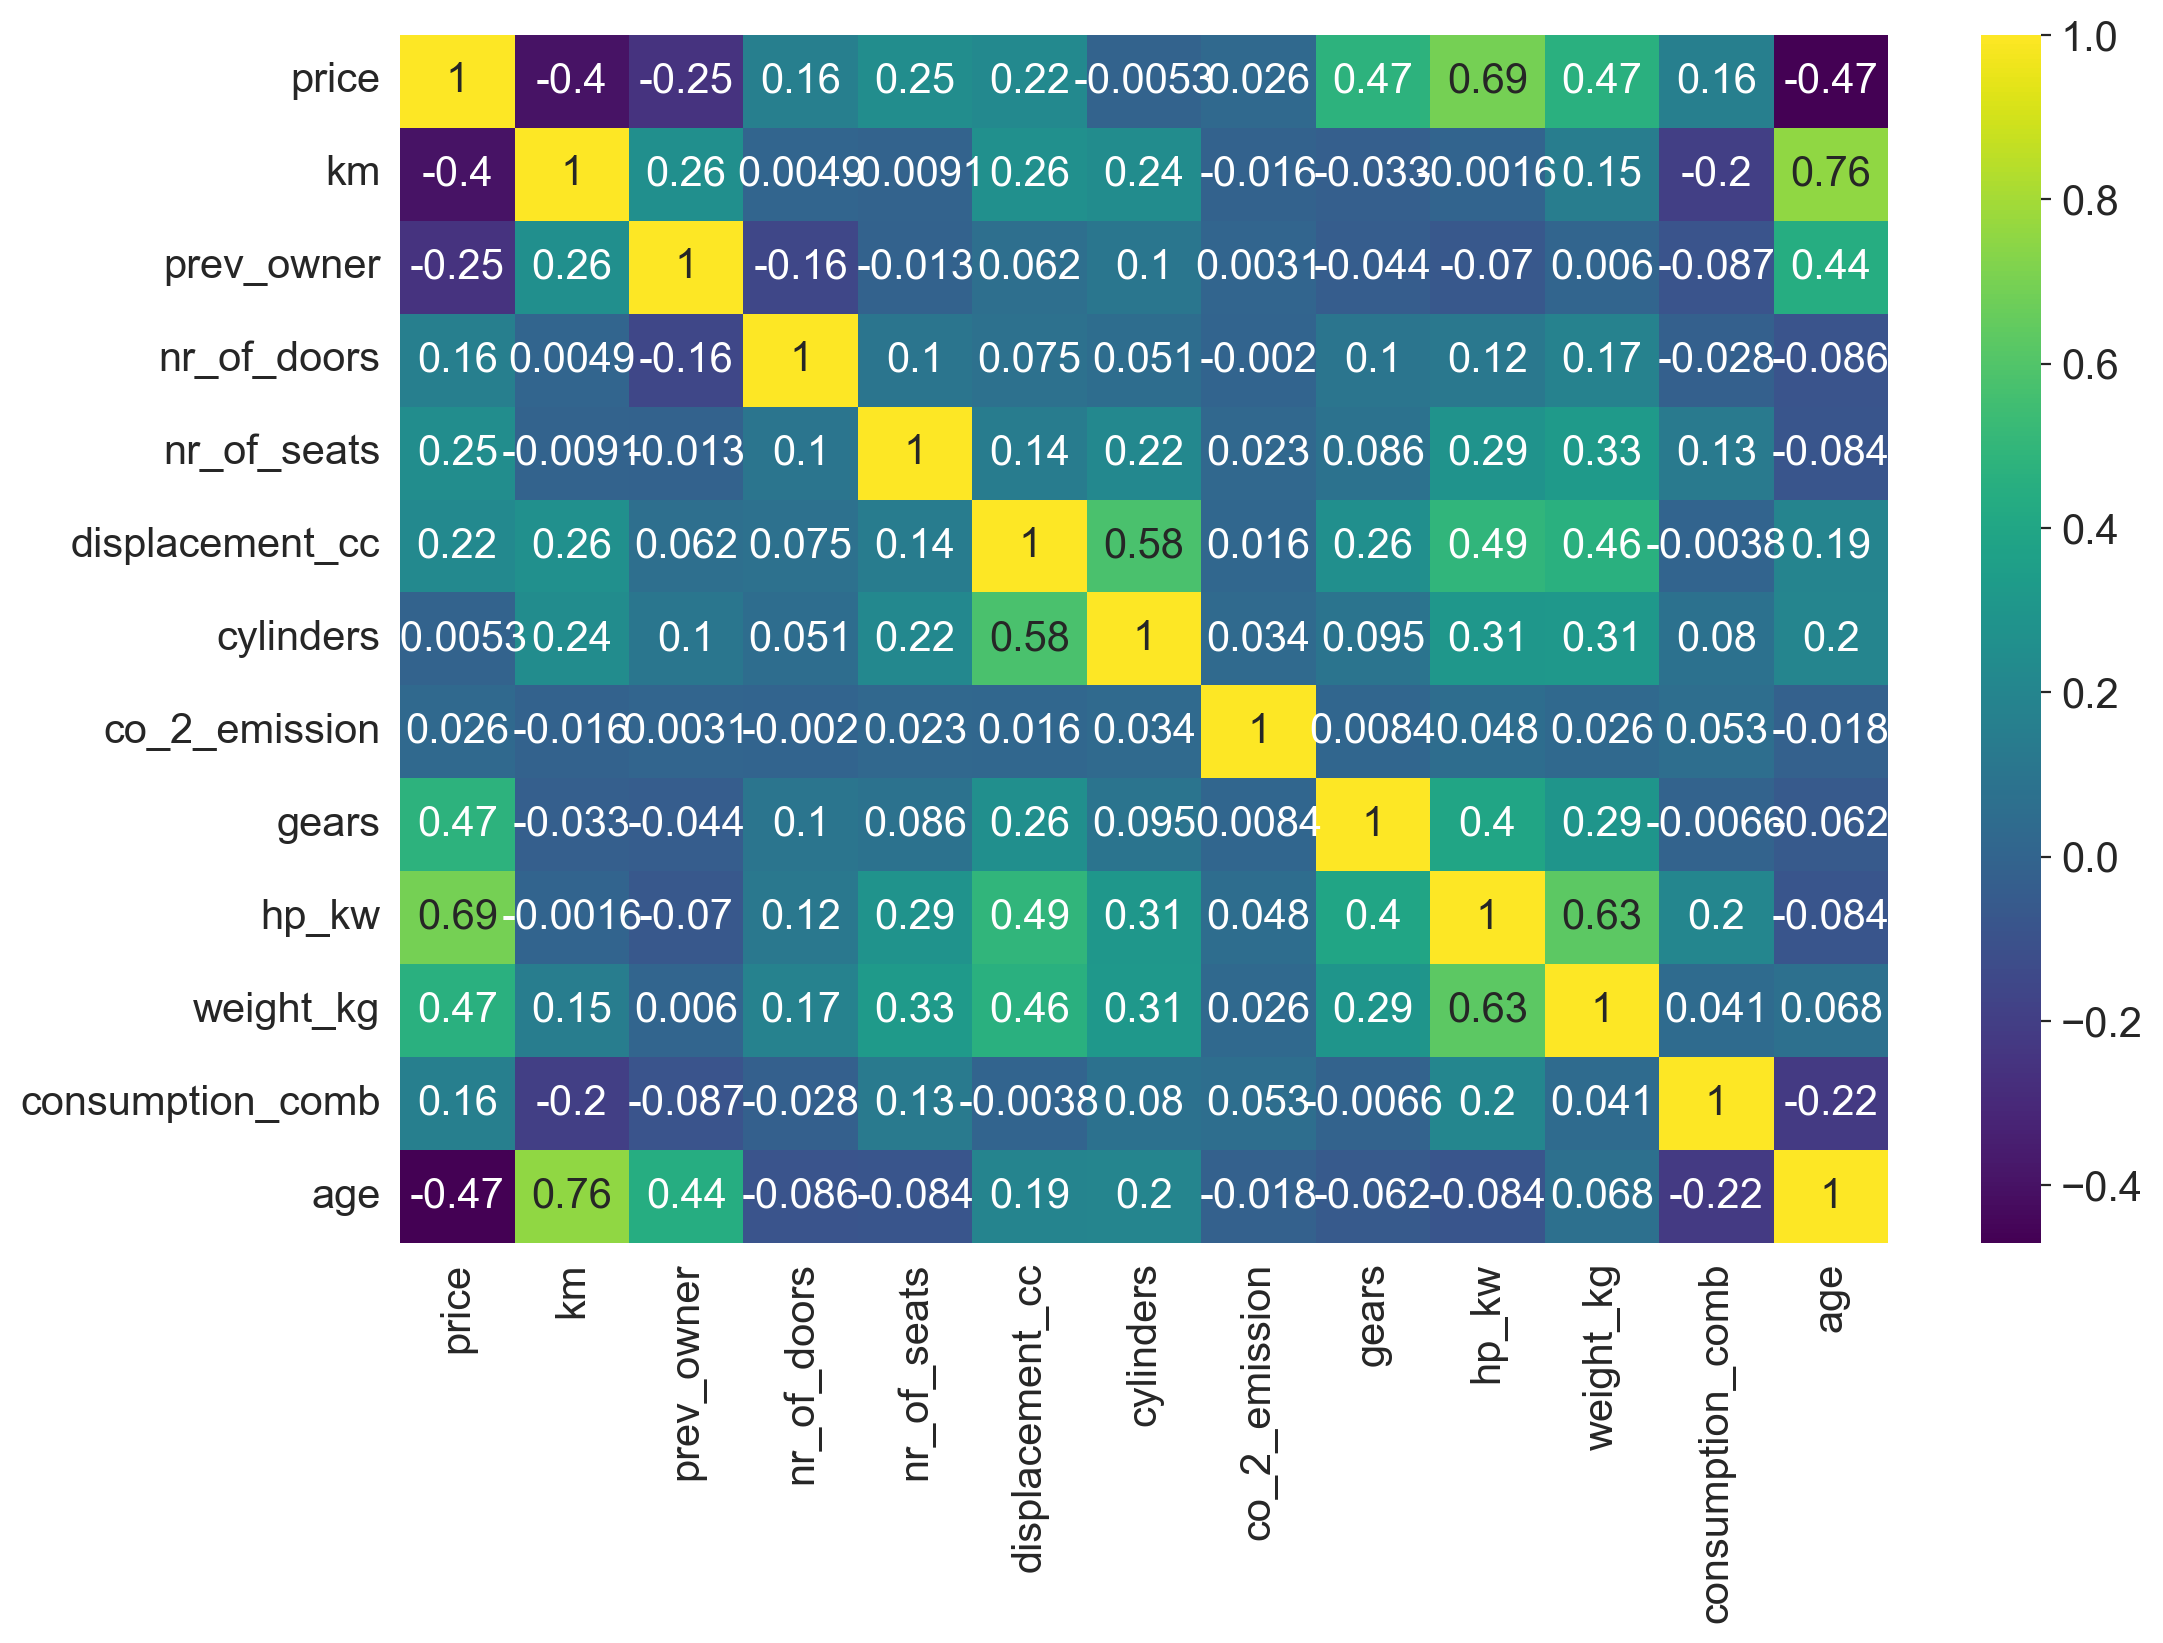

In [477]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df_numeric.corr(), cmap="viridis", annot=True);

In [478]:
df_num_corr = df_numeric.corr()["price"][:-1]
df_num_corr

price               1.00
km                 -0.40
prev_owner         -0.25
nr_of_doors         0.16
nr_of_seats         0.25
displacement_cc     0.22
cylinders          -0.01
co_2_emission       0.03
gears               0.47
hp_kw               0.69
weight_kg           0.47
consumption_comb    0.16
Name: price, dtype: float64

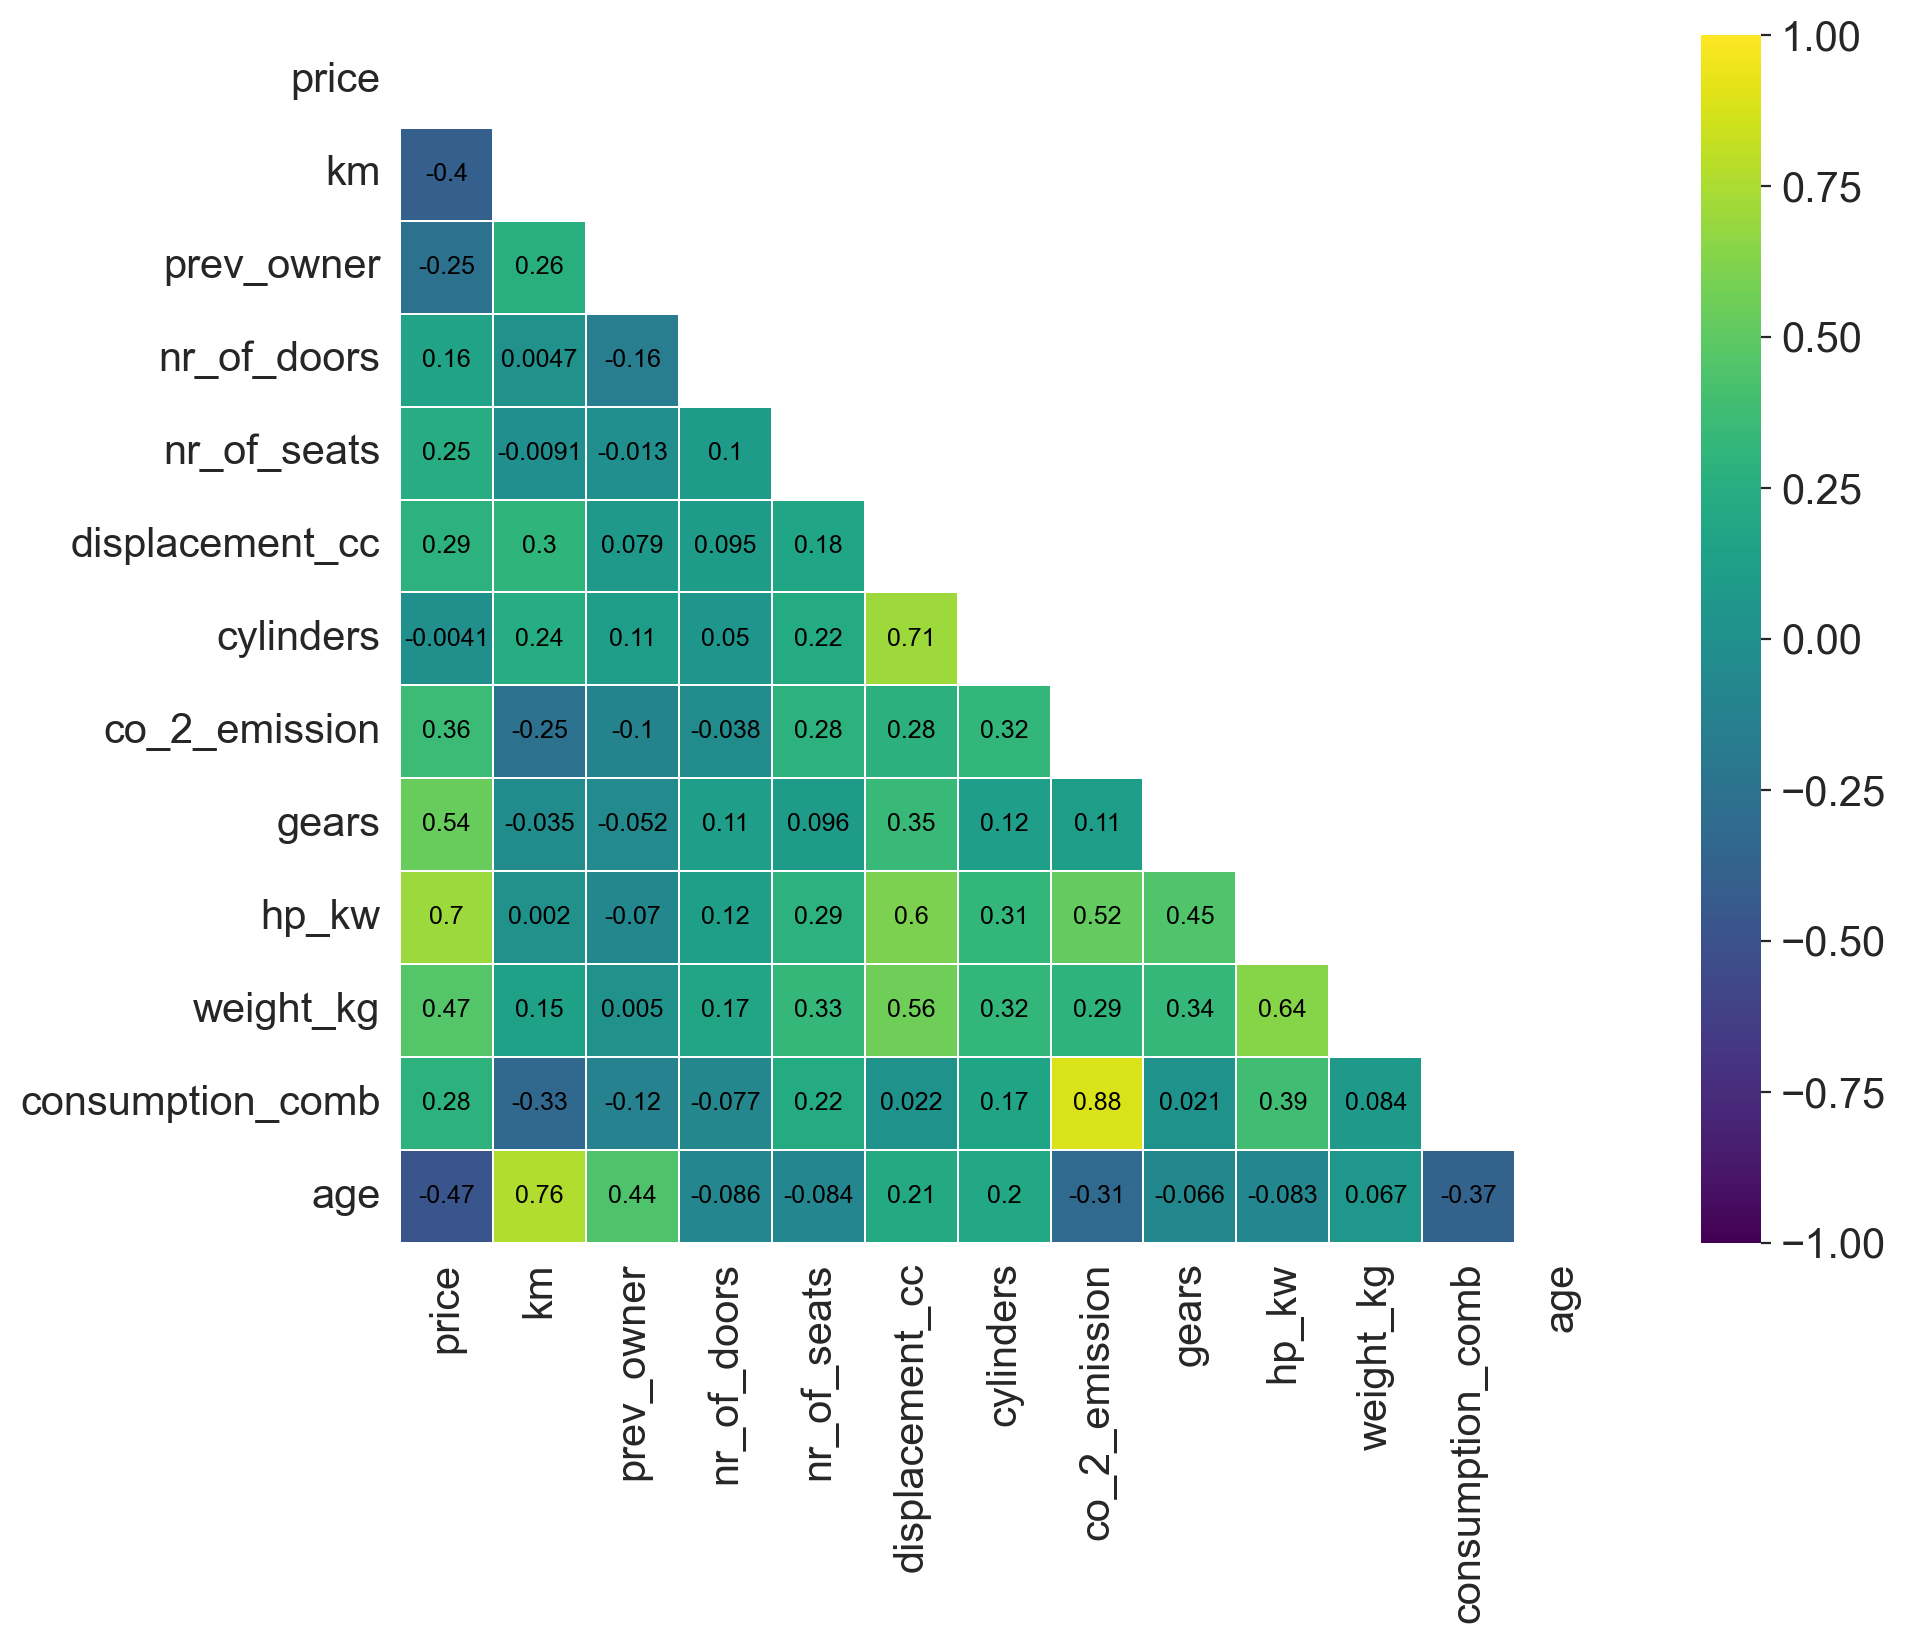

In [479]:
# Heatmap for all the remaining numerical data including the target 'price'

plt.figure(figsize=(12,8), dpi=200)

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df.corr(method = 'pearson')

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix,  mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True);

In [480]:
weak_features_list = df_num_corr[abs(df_num_corr) <= 0.25].sort_values(ascending=False)
weak_features_list

nr_of_seats         0.25
displacement_cc     0.22
consumption_comb    0.16
nr_of_doors         0.16
co_2_emission       0.03
cylinders          -0.01
Name: price, dtype: float64

It can be dropped by examining the columns with a correlation value of less than 0.25 with the price column.

The columns to drop are cylinders and nr_of_doors.

In [482]:
df.drop(columns=["cylinders","nr_of_doors"], inplace=True)

In [483]:
df.shape

(15919, 26)

## Handling with outliers for categoric columns

In [484]:
df_categoric= df.select_dtypes(include=["object"])

In [485]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15919 non-null  object
 1   body_type            15919 non-null  object
 2   type                 15919 non-null  object
 3   body_color           15919 non-null  object
 4   paint_type           15919 non-null  object
 5   gearing_type         15919 non-null  object
 6   drive_chain          15919 non-null  object
 7   fuel                 15919 non-null  object
 8   emission_class       15919 non-null  object
 9   comfort_convenience  15919 non-null  object
 10  entertainment_media  15919 non-null  object
 11  extras               15919 non-null  object
 12  safety_security      15919 non-null  object
 13  upholstery_type      15919 non-null  object
 14  upholstery_color     15919 non-null  object
dtypes: object(15)
memory usage: 1.8+ MB


In [486]:
df_categoric.nunique()

make_model                9
body_type                 9
type                      5
body_color               14
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
emission_class            6
comfort_convenience    6198
entertainment_media     346
extras                  659
safety_security        4443
upholstery_type           5
upholstery_color         10
dtype: int64

In [487]:
# taking columns having less then 15 nunique and appending price column for further analysis

categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15919 non-null  object 
 1   body_type         15919 non-null  object 
 2   type              15919 non-null  object 
 3   body_color        15919 non-null  object 
 4   paint_type        15919 non-null  object 
 5   gearing_type      15919 non-null  object 
 6   drive_chain       15919 non-null  object 
 7   fuel              15919 non-null  object 
 8   emission_class    15919 non-null  object 
 9   upholstery_type   15919 non-null  object 
 10  upholstery_color  15919 non-null  object 
 11  price             15919 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.5+ MB


### Countplot for categorical columns

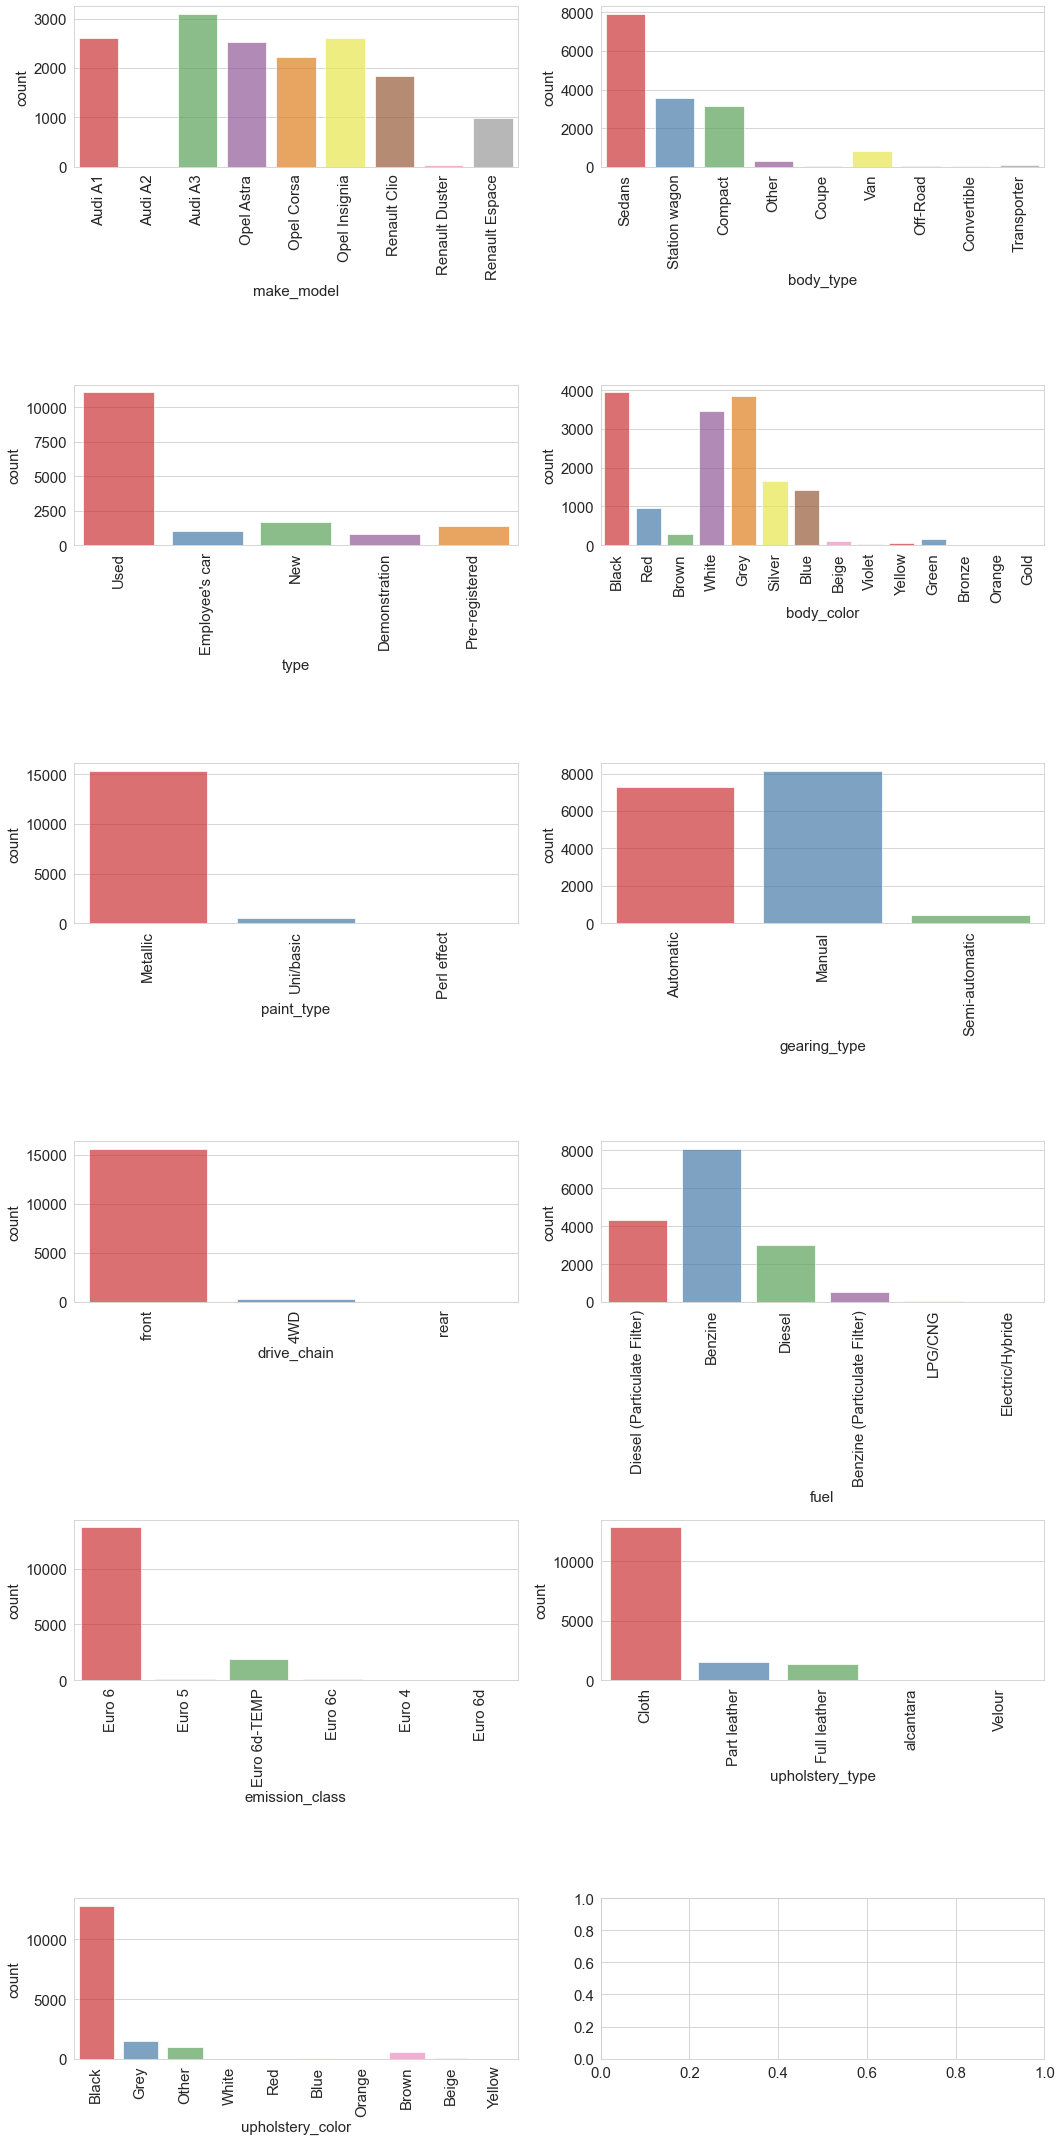

In [488]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")

fig.tight_layout()

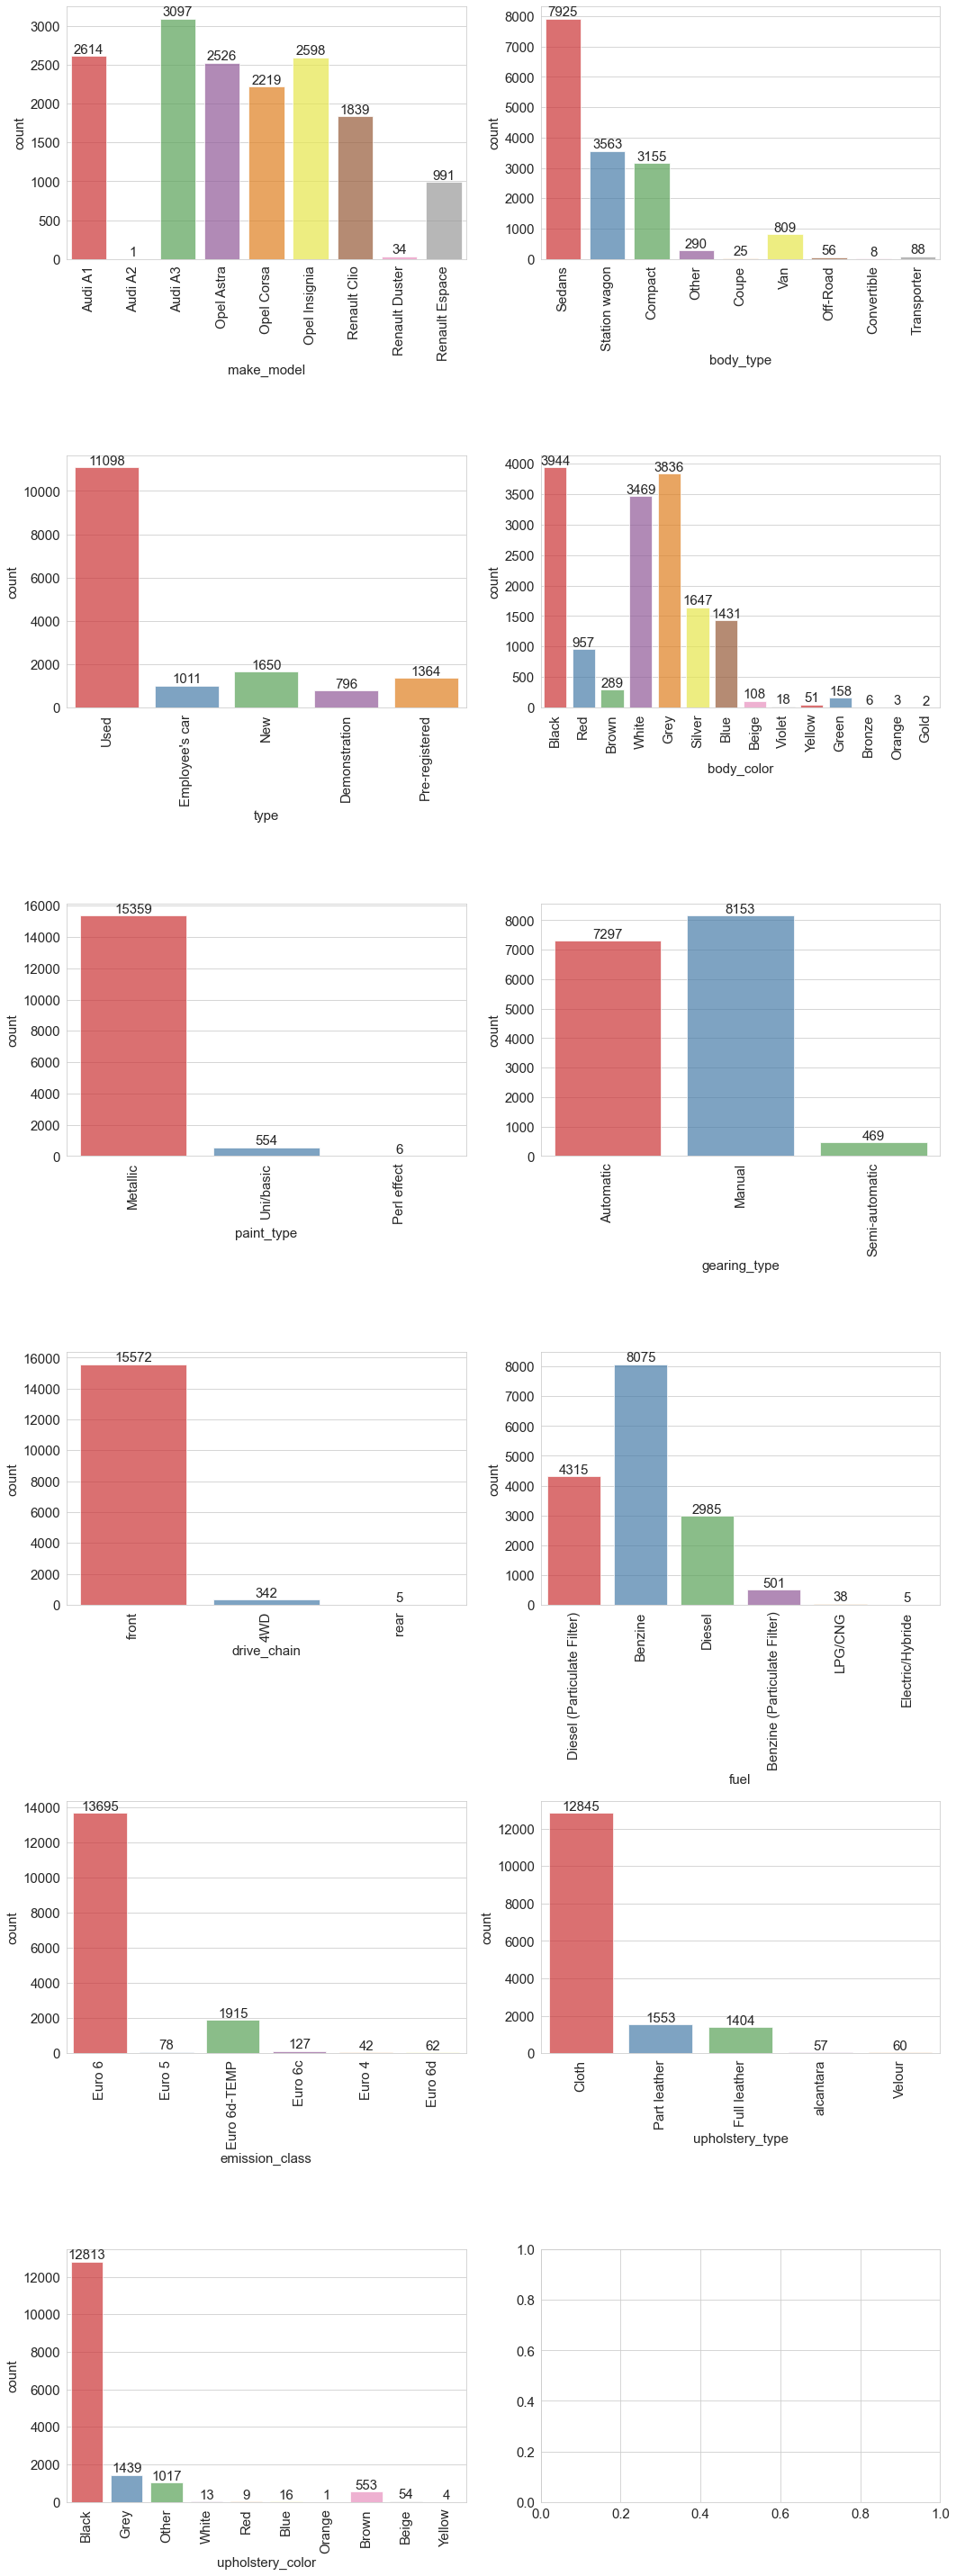

In [489]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 40))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

### Boxplots for categorical columns

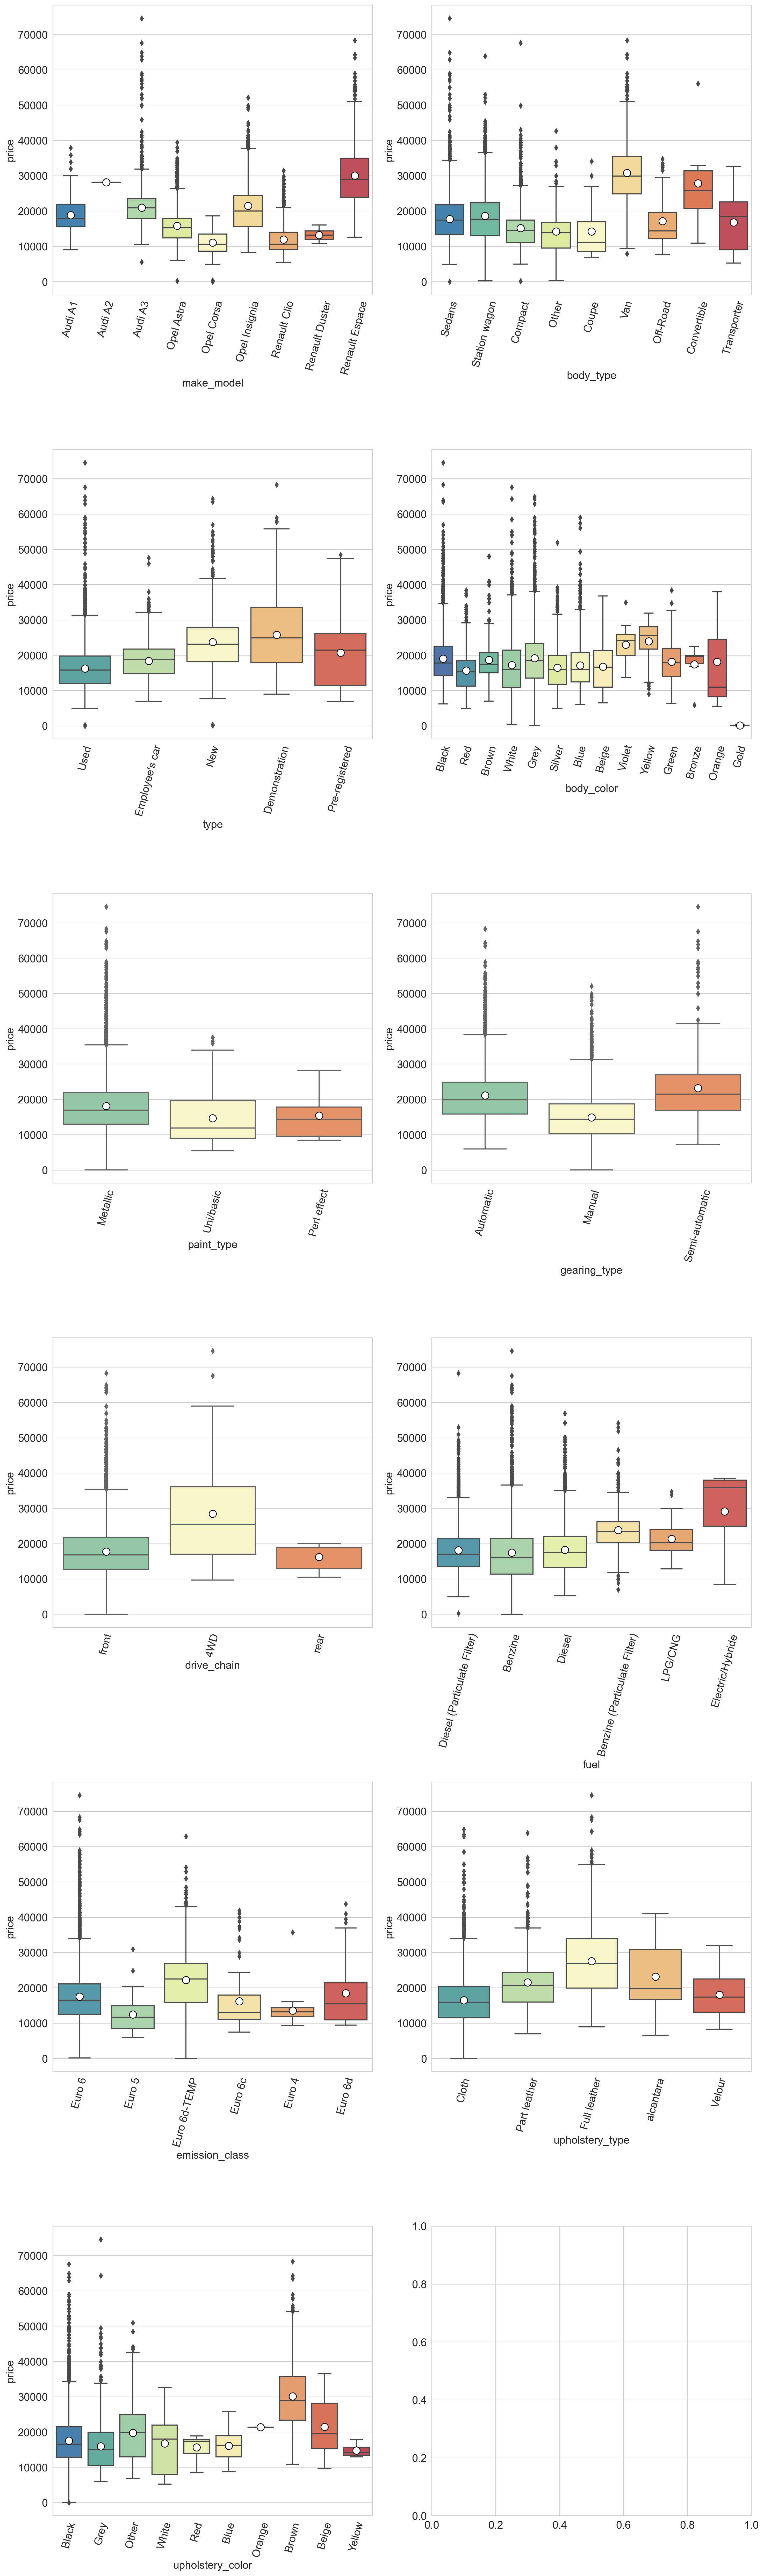

In [490]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 50), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [491]:
df['emission_class'].value_counts(dropna=False).sort_index().astype('category').cat.codes

Euro 4          0
Euro 5          2
Euro 6          5
Euro 6c         3
Euro 6d         1
Euro 6d-TEMP    4
dtype: int8

In [492]:
# Açılama : neden bu kolonların düşüldüğünü belirten bir açıklama yaz.

cols_to_drop = [ "body_color", "emission_class", "upholstery_color"]

df_categoric.drop(cols_to_drop, axis=1, inplace=True)

In [493]:
# drop cols_to_drop from df

df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [494]:
df.shape

(15919, 23)

In [240]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'body_color', 'paint_type', 'nr_of_doors', 'nr_of_seats',
       'gearing_type', 'displacement_cc', 'cylinders', 'drive_chain', 'fuel',
       'co_2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'upholstery_color', 'weight_kg', 'consumption_comb',
       'age'],
      dtype='object')

### Outliers in target feature (price)

In [495]:
iqr_lower_upper("price")

lower limit : -725.0,
upper limit: 35475.0,
the number of extreme values outside the lower and upper limits : 479


In [496]:
df.price.describe()

count   15,919.00
mean    18,019.90
std      7,386.17
min         13.00
25%     12,850.00
50%     16,900.00
75%     21,900.00
max     74,600.00
Name: price, dtype: float64

In [497]:
df.price.sort_values().head(50)

8594       13.00
8828      120.00
6066      255.00
8829      331.00
8827    4,950.00
8825    4,990.00
8826    5,250.00
8824    5,300.00
13770   5,445.00
8823    5,450.00
8822    5,490.00
8820    5,499.00
3235    5,555.00
8821    5,600.00
13763   5,700.00
13762   5,800.00
13760   5,850.00
13759   5,890.00
8818    5,890.00
13761   5,900.00
13757   5,900.00
13758   5,900.00
13756   5,938.00
8819    5,950.00
8602    5,970.00
8600    5,970.00
8601    5,970.00
8597    5,990.00
13755   6,000.00
13754   6,000.00
5712    6,000.00
8599    6,100.00
8598    6,200.00
13753   6,200.00
8596    6,200.00
13752   6,200.00
13751   6,250.00
8816    6,250.00
13749   6,290.00
8807    6,290.00
8806    6,299.00
8805    6,300.00
8803    6,380.00
8802    6,390.00
13750   6,400.00
8801    6,400.00
8799    6,450.00
8804    6,450.00
8800    6,479.00
8796    6,480.00
Name: price, dtype: float64

In [498]:
df.price.value_counts().sort_index().head(50)

13.00       1
120.00      1
255.00      1
331.00      1
4,950.00    1
4,990.00    1
5,250.00    1
5,300.00    1
5,445.00    1
5,450.00    1
5,490.00    1
5,499.00    1
5,555.00    1
5,600.00    1
5,700.00    1
5,800.00    1
5,850.00    1
5,890.00    2
5,900.00    3
5,938.00    1
5,950.00    1
5,970.00    3
5,990.00    1
6,000.00    3
6,100.00    1
6,200.00    4
6,250.00    2
6,290.00    2
6,299.00    1
6,300.00    1
6,380.00    1
6,390.00    1
6,400.00    2
6,450.00    2
6,479.00    1
6,480.00    4
6,489.00    1
6,490.00    4
6,499.00    2
6,500.00    6
6,580.00    1
6,590.00    1
6,600.00    2
6,660.00    1
6,690.00    2
6,700.00    1
6,780.00    3
6,790.00    2
6,800.00    1
6,850.00    3
Name: price, dtype: int64

In [499]:
# 4000'in altındaki değerler extrem gibi görünüyor. Bunları düşebiliriz.

df[df.price < 4000]

make_model      body_type  price       km  prev_owner  type paint_type  \
6066  Opel Astra  Station wagon 255.00 5,563.00        1.00  Used   Metallic   
8594  Opel Corsa         Sedans  13.00   123.00        1.00  Used   Metallic   
8828  Opel Corsa        Compact 120.00    12.00        0.00   New   Metallic   
8829  Opel Corsa          Other 331.00    10.00        0.00   New   Metallic   

      nr_of_seats gearing_type  displacement_cc drive_chain  \
6066         5.00       Manual         1,600.00       front   
8594         5.00       Manual         1,400.00       front   
8828         5.00       Manual         1,000.00       front   
8829         5.00       Manual         1,000.00       front   

                             fuel  co_2_emission  \
6066  Diesel (Particulate Filter)         101.00   
8594                      Benzine         128.00   
8828                      Benzine         107.00   
8829                      Benzine         139.00   

                                    comfort_convenience  \
6066  Air conditioning,Cruise control,Electrical sid...   
8594  Air conditioning,Cruise control,Electrical sid...   
8828  Air conditioning,Automatic climate control,Cru...   
8829  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
6066  Bluetooth,Hands-free equipment,On-board comput...   
8594  Bluetooth,CD player,Hands-free equipment,MP3,O...   
8828              Digital radio,On-board computer,Radio   
8829       Hands-free equipment,On-board computer,Radio   

                             extras  \
6066                      Roof rack   
8594                   Alloy wheels   
8828  Alloy wheels,Sport suspension   
8829     Alloy wheels,Sport package   

                                        safety_security  gears  hp_kw  \
6066  ABS,Central door lock with remote control,Dayt...   6.00 100.00   
8594  ABS,Adaptive headlights,Central door lock with...   5.00  66.00   
8828  Central door lock,Daytime running lights,Drive...   6.00  66.00   
8829  ABS,Central door lock,Driver-side airbag,Elect...   6.00  66.00   

     upholstery_type  weight_kg  consumption_comb  age  
6066           Cloth   1,403.00              3.80 1.00  
8594           Cloth   1,141.00              5.60 1.00  
8828           Cloth   1,099.00              4.60 0.00  
8829           Cloth   1,163.00              5.40 0.00

In [500]:
# drop outliers in tagret feature (price)

df.drop(index=df[df.price < 4000].index, inplace=True)

In [501]:
df.shape

(15915, 23)

In [502]:
df_categoric=df.select_dtypes(include="O")
df_categoric.shape

(15915, 12)

In [503]:
df.shape

(15915, 23)

In [504]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

# Final Step (Checking final situation of data via graphs)

## Scatter plot for final df numerical features

In [505]:
# Updating df_numeric

df_numeric= df.select_dtypes(exclude=["object"])

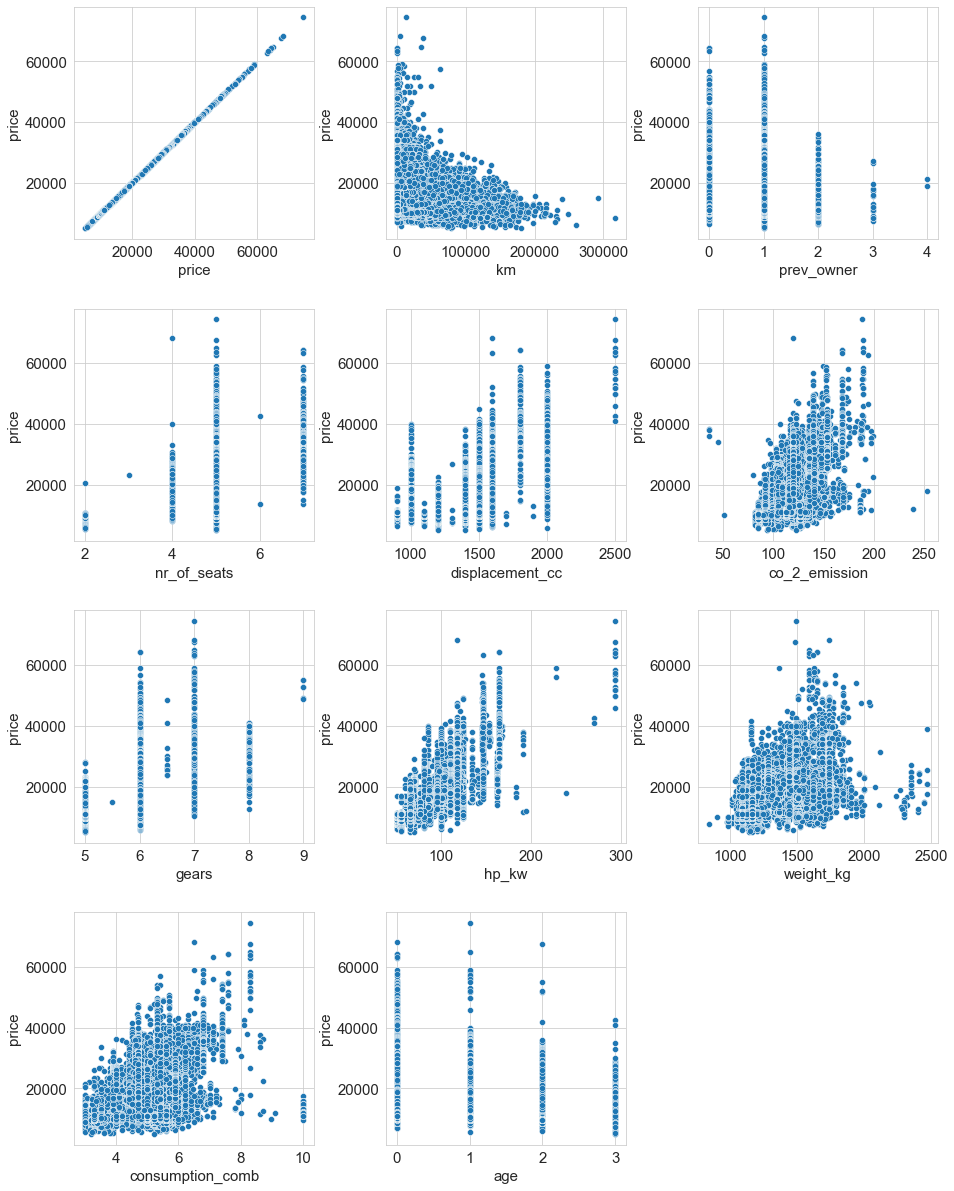

In [506]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

When the chart above is examined, the correlation value between the said columns and the price is remarkable.

Now, let's look at regplots of all columns.

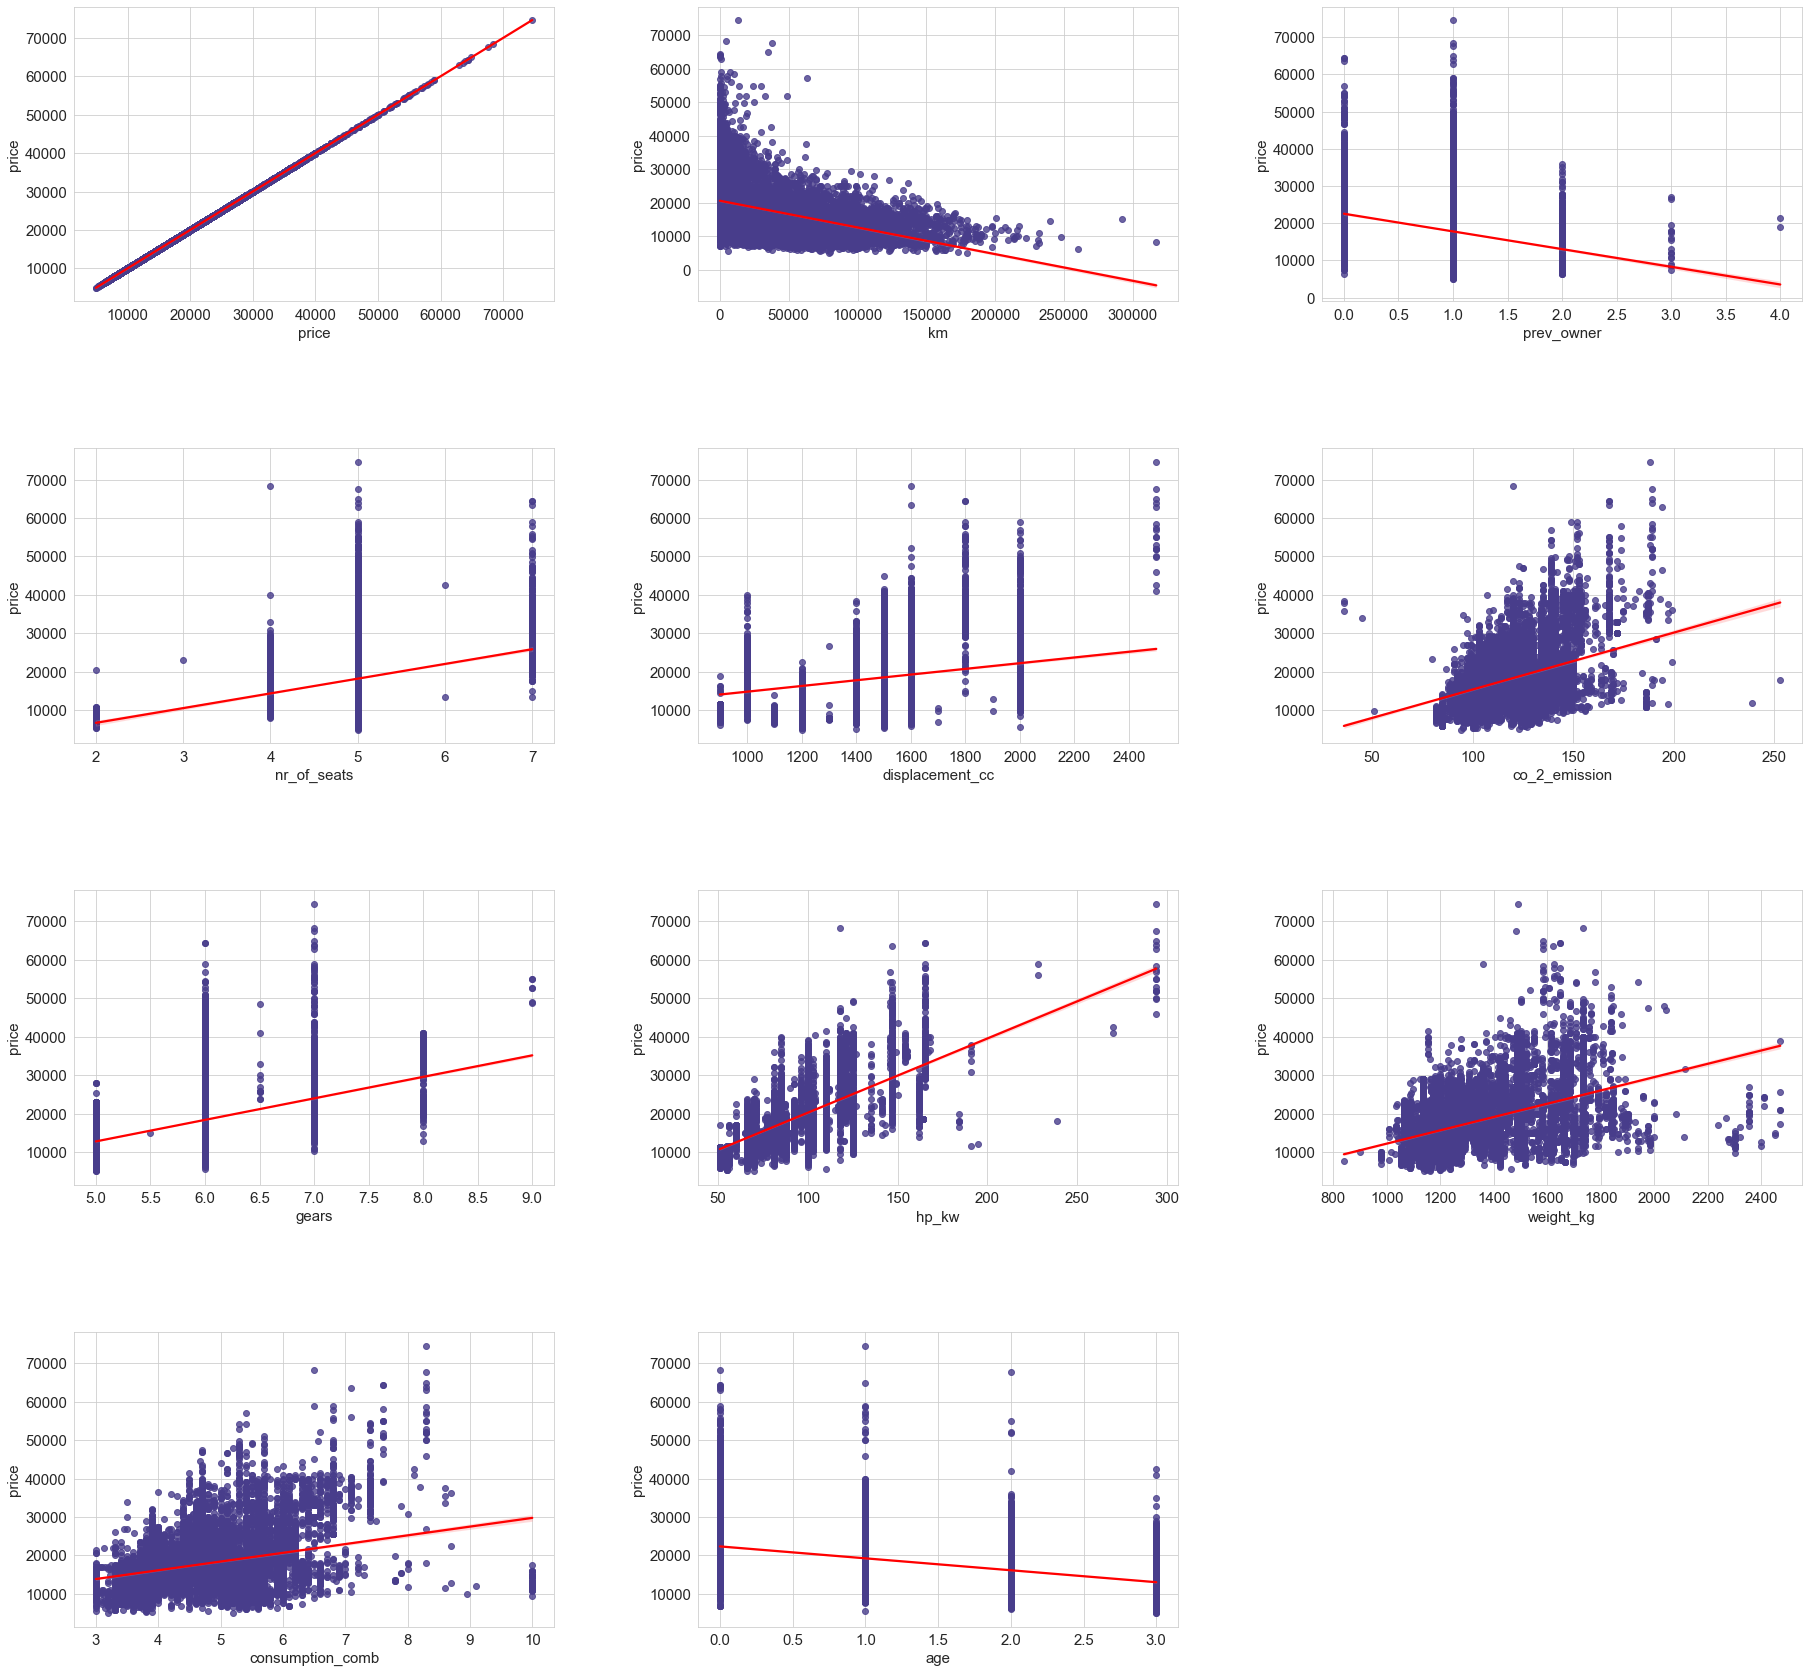

In [507]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

## Boxplots for final df categorical features

In [508]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15915 non-null  object 
 1   body_type        15915 non-null  object 
 2   type             15915 non-null  object 
 3   paint_type       15915 non-null  object 
 4   gearing_type     15915 non-null  object 
 5   drive_chain      15915 non-null  object 
 6   fuel             15915 non-null  object 
 7   upholstery_type  15915 non-null  object 
 8   price            15915 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


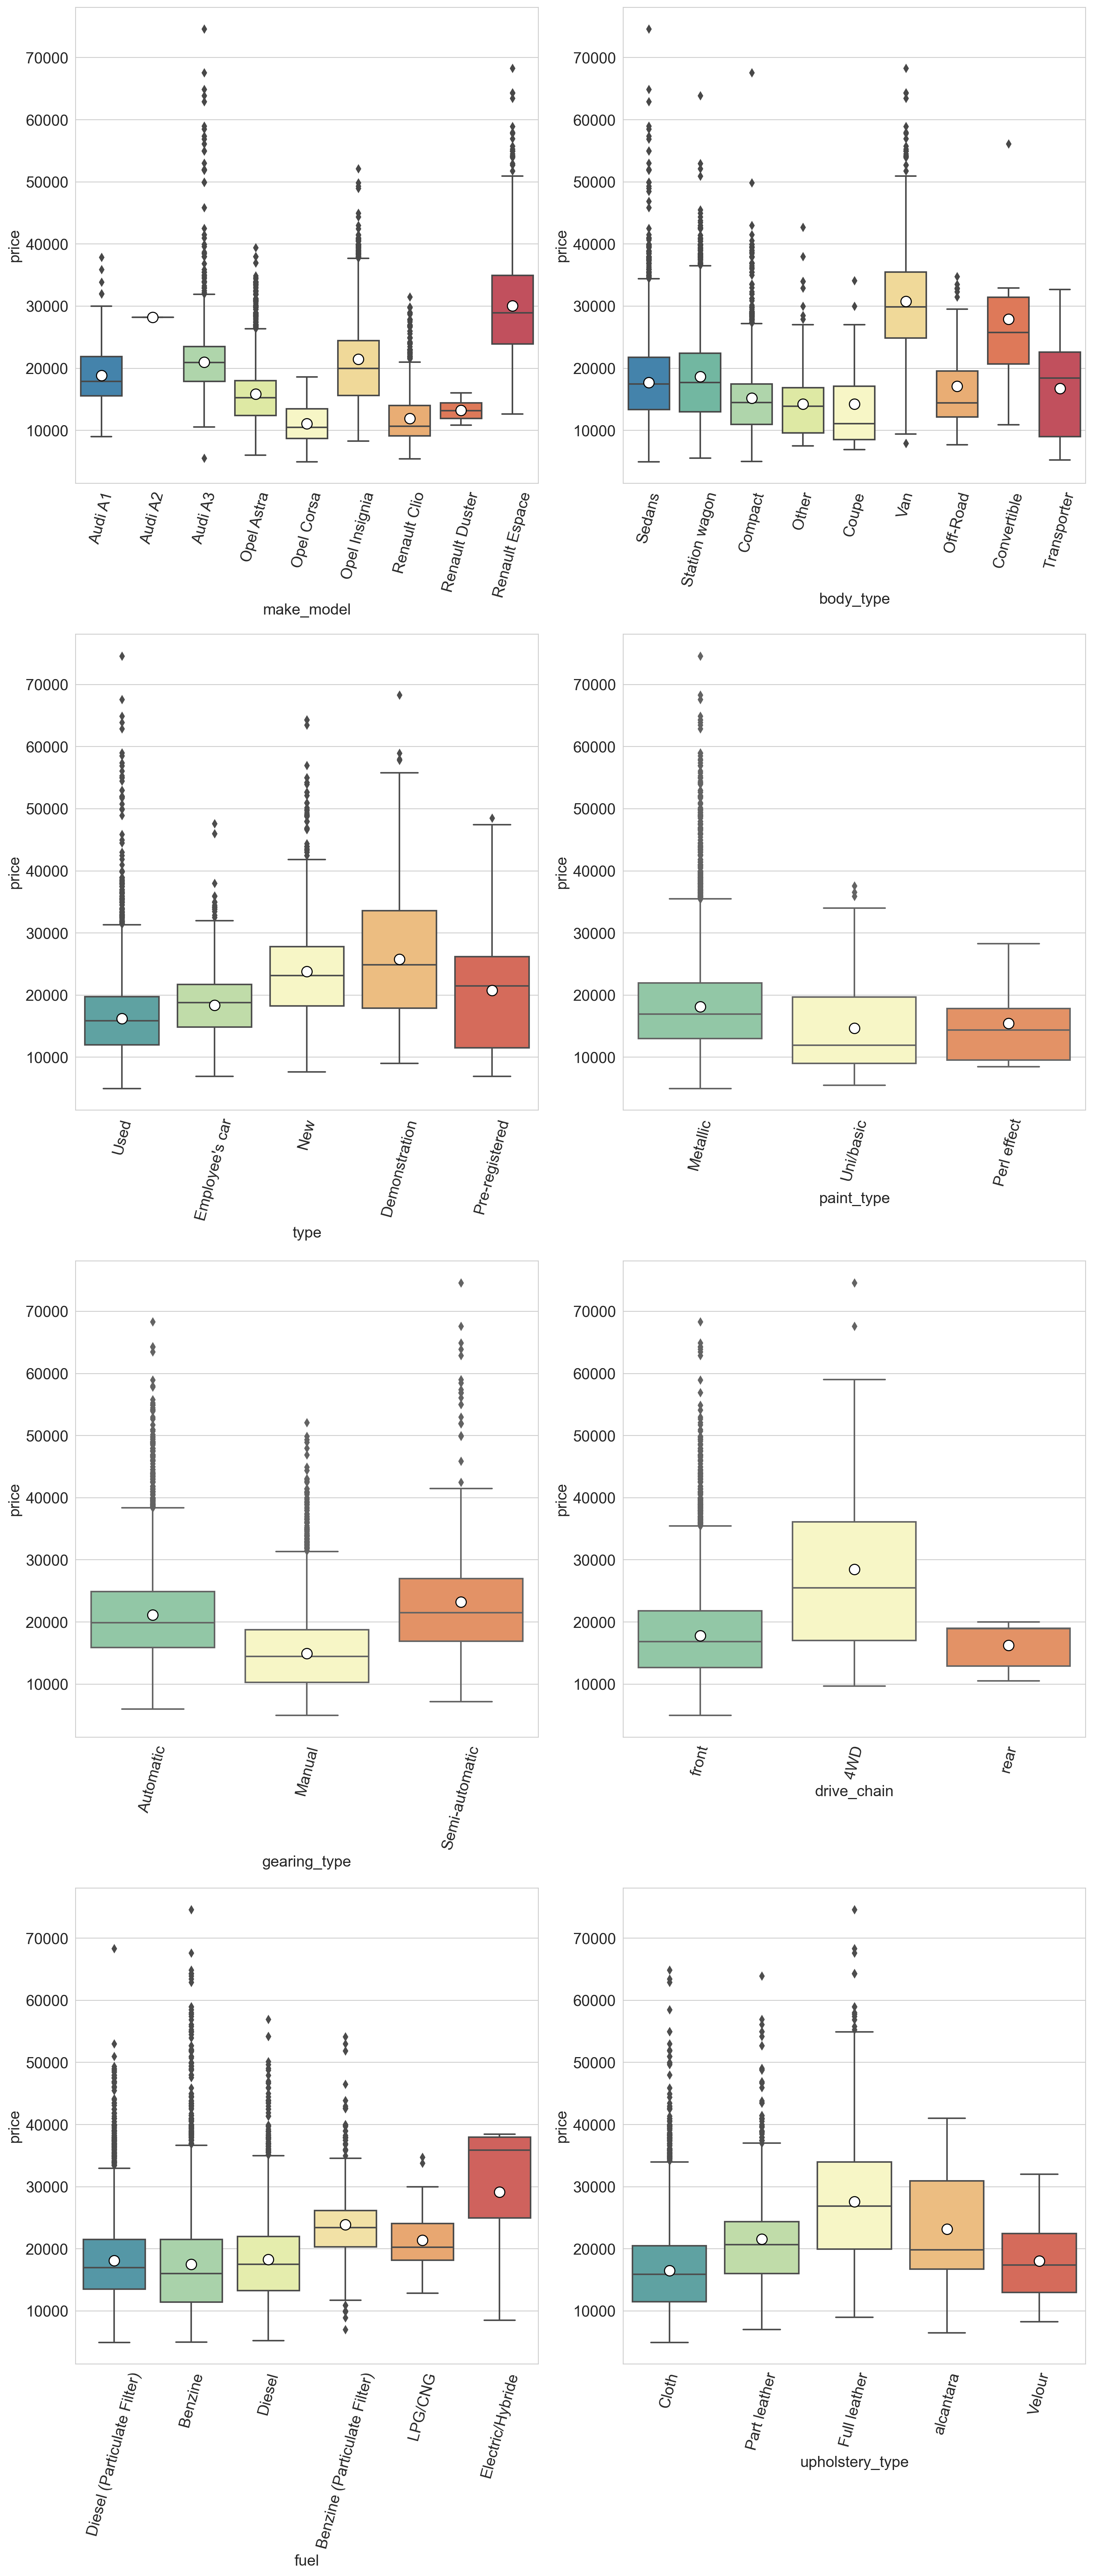

In [509]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

When the chart above is examined, we see that the categorical columns we have are effective on the price.

## Export dataframe to csv file (without dummy)

In [510]:
df.to_csv("final_scout_not_dummy.csv", index=False)

In [511]:
pd.read_csv("final_scout_not_dummy.csv")

make_model body_type     price        km  prev_owner  \
0             Audi A1    Sedans 15,770.00 56,013.00        2.00   
1             Audi A1    Sedans 14,500.00 80,000.00        1.00   
2             Audi A1    Sedans 14,640.00 83,450.00        1.00   
3             Audi A1    Sedans 14,500.00 73,000.00        1.00   
4             Audi A1    Sedans 16,790.00 16,200.00        1.00   
...               ...       ...       ...       ...         ...   
15910  Renault Espace       Van 39,950.00     10.00        0.00   
15911  Renault Espace       Van 39,885.00  9,900.00        1.00   
15912  Renault Espace       Van 39,875.00     15.00        1.00   
15913  Renault Espace       Van 39,700.00     10.00        1.00   
15914  Renault Espace       Van 40,999.00  2,900.00        1.00   

                 type paint_type  nr_of_seats gearing_type  displacement_cc  \
0                Used   Metallic         5.00    Automatic         1,400.00   
1                Used   Metallic         4.00    Automatic         1,800.00   
2                Used   Metallic         4.00    Automatic         1,600.00   
3                Used   Metallic         4.00    Automatic         1,400.00   
4                Used   Metallic         5.00    Automatic         1,400.00   
...               ...        ...          ...          ...              ...   
15910             New   Metallic         5.00    Automatic         2,000.00   
15911            Used   Metallic         5.00    Automatic         1,800.00   
15912  Pre-registered   Metallic         7.00    Automatic         2,000.00   
15913  Pre-registered   Metallic         7.00    Automatic         2,000.00   
15914   Demonstration   Metallic         5.00    Automatic         1,800.00   

      drive_chain                          fuel  co_2_emission  \
0           front   Diesel (Particulate Filter)          99.00   
1           front                       Benzine         129.00   
2           front   Diesel (Particulate Filter)          99.00   
3           front   Diesel (Particulate Filter)          99.00   
4           front   Diesel (Particulate Filter)         109.00   
...           ...                           ...            ...   
15910       front   Diesel (Particulate Filter)         139.00   
15911       front  Benzine (Particulate Filter)         168.00   
15912       front                        Diesel         139.00   
15913       front                        Diesel         139.00   
15914         4WD                       Benzine         153.00   

                                     comfort_convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15910  Air conditioning,Automatic climate control,Cru...   
15911  Air conditioning,Automatic climate control,Cru...   
15912  Air conditioning,Armrest,Automatic climate con...   
15913  Air conditioning,Automatic climate control,Cru...   
15914  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15910  Bluetooth,Digital radio,Hands-free equipment,O...   
15911  Bluetooth,Digital radio,Hands-free equipment,R...   
15912  Bluetooth,Hands-free equipment,On-board comput...   
15913                  Bluetooth,Digital radio,Radio,USB   
15914                                                USB   

                      

# Dummy Operation

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  float64
 3   km                   15915 non-null  float64
 4   prev_owner           15915 non-null  float64
 5   type                 15915 non-null  object 
 6   paint_type           15915 non-null  object 
 7   nr_of_seats          15915 non-null  float64
 8   gearing_type         15915 non-null  object 
 9   displacement_cc      15915 non-null  float64
 10  drive_chain          15915 non-null  object 
 11  fuel                 15915 non-null  object 
 12  co_2_emission        15915 non-null  float64
 13  comfort_convenience  15915 non-null  object 
 14  entertainment_media  15915 non-null  object 
 15  extras               15915 non-null 

In [513]:
# Consider columns with unique values less than 15.
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
df_categoric = df[categorical_features]
df_categoric

make_model body_type            type paint_type gearing_type  \
0             Audi A1    Sedans            Used   Metallic    Automatic   
1             Audi A1    Sedans            Used   Metallic    Automatic   
2             Audi A1    Sedans            Used   Metallic    Automatic   
3             Audi A1    Sedans            Used   Metallic    Automatic   
4             Audi A1    Sedans            Used   Metallic    Automatic   
...               ...       ...             ...        ...          ...   
15914  Renault Espace       Van             New   Metallic    Automatic   
15915  Renault Espace       Van            Used   Metallic    Automatic   
15916  Renault Espace       Van  Pre-registered   Metallic    Automatic   
15917  Renault Espace       Van  Pre-registered   Metallic    Automatic   
15918  Renault Espace       Van   Demonstration   Metallic    Automatic   

      drive_chain                          fuel upholstery_type  
0           front   Diesel (Particulate Filter)           Cloth  
1           front                       Benzine           Cloth  
2           front   Diesel (Particulate Filter)           Cloth  
3           front   Diesel (Particulate Filter)           Cloth  
4           front   Diesel (Particulate Filter)           Cloth  
...           ...                           ...             ...  
15914       front   Diesel (Particulate Filter)    Full leather  
15915       front  Benzine (Particulate Filter)           Cloth  
15916       front                        Diesel    Full leather  
15917       front                        Diesel    Part leather  
15918         4WD                       Benzine    Full leather  

[15915 rows x 8 columns]

In [514]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15915 non-null  object
 1   body_type        15915 non-null  object
 2   type             15915 non-null  object
 3   paint_type       15915 non-null  object
 4   gearing_type     15915 non-null  object
 5   drive_chain      15915 non-null  object
 6   fuel             15915 non-null  object
 7   upholstery_type  15915 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [515]:
df_dummied = pd.get_dummies(columns=list(df_categoric.columns), data=df, drop_first=True)

In [516]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              15915 non-null  float64
 1   km                                 15915 non-null  float64
 2   prev_owner                         15915 non-null  float64
 3   nr_of_seats                        15915 non-null  float64
 4   displacement_cc                    15915 non-null  float64
 5   co_2_emission                      15915 non-null  float64
 6   comfort_convenience                15915 non-null  object 
 7   entertainment_media                15915 non-null  object 
 8   extras                             15915 non-null  object 
 9   safety_security                    15915 non-null  object 
 10  gears                              15915 non-null  float64
 11  hp_kw                              15915 non-null  flo

In [517]:
df_dummied =df_dummied.join(df_dummied['comfort_convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df_dummied= df_dummied.join(df_dummied['entertainment_media'].str.get_dummies(sep=',').add_prefix('EM_'))
df_dummied= df_dummied.join(df_dummied['extras'].str.get_dummies(sep=',').add_prefix('E_'))
df_dummied= df_dummied.join(df_dummied['safety_security'].str.get_dummies(sep=',').add_prefix('SS_'))

In [518]:
df_dummied

price        km  prev_owner  nr_of_seats  displacement_cc  \
0     15,770.00 56,013.00        2.00         5.00         1,400.00   
1     14,500.00 80,000.00        1.00         4.00         1,800.00   
2     14,640.00 83,450.00        1.00         4.00         1,600.00   
3     14,500.00 73,000.00        1.00         4.00         1,400.00   
4     16,790.00 16,200.00        1.00         5.00         1,400.00   
...         ...       ...         ...          ...              ...   
15914 39,950.00     10.00        0.00         5.00         2,000.00   
15915 39,885.00  9,900.00        1.00         5.00         1,800.00   
15916 39,875.00     15.00        1.00         7.00         2,000.00   
15917 39,700.00     10.00        1.00         7.00         2,000.00   
15918 40,999.00  2,900.00        1.00         5.00         1,800.00   

       co_2_emission                                comfort_convenience  \
0              99.00  Air conditioning,Armrest,Automatic climate con...   
1             129.00  Air conditioning,Automatic climate control,Hil...   
2              99.00  Air conditioning,Cruise control,Electrical sid...   
3              99.00  Air suspension,Armrest,Auxiliary heating,Elect...   
4             109.00  Air conditioning,Armrest,Automatic climate con...   
...              ...                                                ...   
15914         139.00  Air conditioning,Automatic climate control,Cru...   
15915         168.00  Air conditioning,Automatic climate control,Cru...   
15916         139.00  Air conditioning,Armrest,Automatic climate con...   
15917         139.00  Air conditioning,Automatic climate control,Cru...   
15918         153.00  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
0      ABS,Central door lock,Daytime running lights,D...   7.00  66.00   
1      ABS,Central door lock,Central door lock with r...   7.00 141.00   
2      ABS,Central door lock,Daytime running lights,D...   7.00  85.00   
3      ABS,Alarm system,Central door lock with remote...   6.00  66.00   
4      ABS,Central door lock,Driver-side airbag,Elect...   7.00  66.00   
...                                                  ...    ...    ...   
15914  ABS,Central door lock,Central door lock with r...   6.00 147.00   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...   7.00 165.00   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...   6.00 146.00   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...   6.00 147.00   


In [519]:
df_dummied.drop(columns=["comfort_convenience", "entertainment_media","extras","safety_security"], inplace=True)

In [520]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Columns: 140 entries, price to SS_Xenon headlights
dtypes: float64(11), int64(94), uint8(35)
memory usage: 13.9 MB


## Export dataframe to csv file (dummy)

In [521]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [522]:
pd.read_csv("final_scout_dummy.csv")

price        km  prev_owner  nr_of_seats  displacement_cc  \
0     15,770.00 56,013.00        2.00         5.00         1,400.00   
1     14,500.00 80,000.00        1.00         4.00         1,800.00   
2     14,640.00 83,450.00        1.00         4.00         1,600.00   
3     14,500.00 73,000.00        1.00         4.00         1,400.00   
4     16,790.00 16,200.00        1.00         5.00         1,400.00   
...         ...       ...         ...          ...              ...   
15910 39,950.00     10.00        0.00         5.00         2,000.00   
15911 39,885.00  9,900.00        1.00         5.00         1,800.00   
15912 39,875.00     15.00        1.00         7.00         2,000.00   
15913 39,700.00     10.00        1.00         7.00         2,000.00   
15914 40,999.00  2,900.00        1.00         5.00         1,800.00   

       co_2_emission  gears  hp_kw  weight_kg  consumption_comb  age  \
0              99.00   7.00  66.00   1,220.00              3.80 3.00   
1             129.00   7.00 141.00   1,255.00              5.60 2.00   
2              99.00   7.00  85.00   1,135.00              3.80 3.00   
3              99.00   6.00  66.00   1,195.00              3.80 3.00   
4             109.00   7.00  66.00   1,135.00              4.10 3.00   
...              ...    ...    ...        ...               ...  ...   
15910         139.00   6.00 147.00   1,758.00              5.30 0.00   
15911         168.00   7.00 165.00   1,708.00              7.40 0.00   
15912         139.00   6.00 146.00   1,734.00              5.30 0.00   
15913         139.00   6.00 147.00   1,758.00              5.30 0.00   
15914         153.00   6.00 165.00   1,685.00              6.80 0.00   

       make_model_Audi A2  make_model_Audi A3  make_model_Opel Astra  \
0                       0                   0                      0   
1                       0                   0                      0   
2                       0                   0                      0   
3                       0                   0                      0   
4                       0                   0                      0   
...                   ...                 ...                    ...   
15910                   0                   0                      0   
15911                   0                   0                      0   
15912                   0                   0                      0   
15913                   0                   0                      0   
15914                   0                   0                      0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
...                      ...                       ...   
15910                      0                         0   
15911                      0                         0   
15912                      0                         0   
15913                      0                         0   
15914                      0                         0   

       make_model_Renault Clio  make_model_Renault Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
15910                        0                          0   
15911                        0                          0   
15912                        0                          0   
15913                        0                          0   
15914                        0                          0  